In [1189]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1190]:
import torch
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1191]:
from pandas import DataFrame
from IPython.display import HTML
#HTML(DataFrame(MYDATA).to_html())
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [1192]:
import sys
sys.path.append('/home/maghoi/fastai/old/')

In [1193]:
from fastai_v7.imports import *
from fastai_v7.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
set_plot_sizes(12,14,16)

In [1194]:
#from fastai.imports import *
#from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [1195]:
!ls main/data

02_Features	      complex_df.npy  names.npy		     X_mhc.npy
02_Features.zip       complex_df.npz  pmhc_df.npy	     X_pep.npy
All_Energy.csv	      complexes.csv   target_y.npy	     X_tcr_a.npy
All_identity.csv      data_X.npy      tcr_blosum.csv	     X_tcr_b.npy
complex_df	      mhc_blosum.csv  tcr_df.npy
complex_df.index.npy  Model_001       temp_model_blosum.csv


In [1196]:
!ls main/data

02_Features	      complex_df.npy  names.npy		     X_mhc.npy
02_Features.zip       complex_df.npz  pmhc_df.npy	     X_pep.npy
All_Energy.csv	      complexes.csv   target_y.npy	     X_tcr_a.npy
All_identity.csv      data_X.npy      tcr_blosum.csv	     X_tcr_b.npy
complex_df	      mhc_blosum.csv  tcr_df.npy
complex_df.index.npy  Model_001       temp_model_blosum.csv


In [1197]:
df_raw = pd.read_csv("/home/maghoi/main/data/complexes.csv", low_memory=False)
all_energy = pd.read_csv("/home/maghoi/main/data/All_Energy.csv", low_memory = False)

In [1198]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [1199]:
df_raw = df_raw.drop("Unnamed: 0", axis = 1)

In [1200]:
#set index to first column then drop it
df_raw = df_raw.set_index(df_raw.iloc[:,0]).drop("key_0", axis = 1)
all_energy = all_energy.set_index(all_energy.iloc[:,0]).drop("Unnamed: 0", axis = 1)

In [1201]:
all_energy.rename(columns = {"Unnamed: 0": "key_0"}, inplace = True)

In [1202]:
all_energy.index.name = "key_0"
df_raw.index.name = "key_0"

In [991]:
display_all(all_energy.tail(20))

M_total energy  M_Backbone Hbond  \
key_0                                                          
5men_0p_R1_1t_99s_pMHC-TCR         37.4091          -140.261   
5men_0p_S1_1t_99s_pMHC-TCR         57.1499          -135.640   
5men_0p_P1_1t_95s_pMHC-TCR         31.3410          -133.143   
5men_0p_N1_1t_95s_pMHC-TCR         42.8556          -139.943   
5men_0p_N2_1t_95s_pMHC-TCR         35.5864          -138.738   
5men_0p_N3_1t_95s_pMHC-TCR         37.0827          -136.312   
5men_0p_R1_1t_95s_pMHC-TCR         33.9896          -138.572   
5men_0p_S1_1t_95s_pMHC-TCR         28.7505          -135.379   
5men_0p_P1_1t_90s_pMHC-TCR         41.5823          -133.021   
5men_0p_N1_1t_90s_pMHC-TCR         32.3616          -142.582   
5men_0p_N2_1t_90s_pMHC-TCR         22.2436          -141.849   
5men_0p_N3_1t_90s_pMHC-TCR         37.7567          -135.491   
5men_0p_R1_1t_90s_pMHC-TCR         31.3661          -140.749   
5men_0p_S1_1t_90s_pMHC-TCR         27.1967          -136.590   
5men_0p_P1_1t_80s_pMHC-TCR         40.4614          -137.219   
5men_0p_N1_1t_80s_pMHC-TCR         36.9587          -144.033   
5men_0p_N2_1t_80s_pMHC-TCR         31.5761          -141.021   
5men_0p_N3_1t_80s_pMHC-TCR         40.1811          -136.156   
5men_0p_R1_1t_80s_pMHC-TCR         36.1609          -133.004   
5men_0p_S1_1t_80s_pMHC-TCR         42.2487          -137.275   

                            M_Sidechain Hbond  M_Van der Waals  \
key_0                                                            
5men_0p_R1_1t_99s_pMHC-TCR           -55.3514         -209.869   
5men_0p_S1_1t_99s_pMHC-TCR           -49.6678         -209.131   
5men_0p_P1_1t_95s_pMHC-TCR           -53.0476         -206.219   
5men_0p_N1_1t_95s_pMHC-TCR           -54.5378         -208.937   
5men_0p_N2_1t_95s_pMHC-TCR           -53.3581         -210.573   
5men_0p_N3_1t_95s_pMHC-TCR           -53.4833         -208.328   
5men_0p_R1_1t_95s_pMHC-TCR           -49.8887         -209.065   
5men_0p_S1_1t_95s_pMHC-TCR           -54.2193         -206.664   
5men_0p_P1_1t_90s_pMHC-TCR           -52.5096         -206.829   
5men_0p_N1_1t_90s_pMHC-TCR           -51.8972         -205.233   
5men_0p_N2_1t_90s_pMHC-TCR           -56.9937         -210.161   
5men_0p_N3_1t_90s_pMHC-TCR           -48.6823         -206.284   
5men_0p_R1_1t_90s_pMHC-TCR           -51.5289         -208.674   
5men_0p_S1_1t_90s_pMHC-TCR           -51.5078         -203.677   
5men_0p_P1_1t_80s_pMHC-TCR           -51.7886         -211.202   
5men_0p_N1_1t_80s_pMHC-TCR           -57.5750         -207.817   
5men_0p_N2_1t_80s_pMHC-TCR           -48.1569         -211.153   
5men_0p_N3_1t_80s_pMHC-TCR           -52.2648         -207.637   
5men_0p_R1_1t_80s_pMHC-TCR           -45.2512         -206.585   
5men_0p_S1_1t_80s_pMHC-TCR           -51.9347         -209.346   

                            M_Electrostatics  M_Solvation Polar  \
key_0                                                             
5men_0p_R1_1t_99s_pMHC-TCR         -10.24710            291.137   
5men_0p_S1_1t_99s_pMHC-TCR          -6.12081            291.321   
5men_0p_P1_1t_95s_pMHC-TCR         -10.36030            285.290   
5men_0p_N1_1t_95s_pMHC-TCR         -10.95930            291.728   
5men_0p_N2_1t_95s_pMHC-TCR         -13.27480            291.624   
5men_0p_N3_1t_95s_pMHC-TCR          -9.86923            290.918   
5men_0p_R1_1t_95s_pMHC-TCR         -11.52320            285.646   
5men_0p_S1_1t_95s_pMHC-TCR         -10.95810            283.611   
5men_0p_P1_1t_90s_pMHC-TCR         -10.64450            288.802   
5men_0p_N1_1t_90s_pMHC-TCR         -10.54160            284.431   
5men_0p_N2_1t_90s_pMHC-TCR         -12.02160            289.171   
5men_0p_N3_1t_90s_pMHC-TCR         -10.60370            284.167   
5men_0p_R1_1t_90s_pMHC-TCR         -11.70520            286.957   
5men_0p_S1_1t_90s_pMHC-TCR          -9.98536            277.779   
5men_0p_P1_1t_80s_pMHC-TCR         -10.84330            292.825   
5men_0p_N1_1t_80s_pMHC-TCR 

In [855]:
display_all(all_energy.tail(20))

M_total energy  M_Backbone Hbond  \
key_0                                                          
5men_0p_R1_1t_99s_pMHC-TCR         37.4091          -140.261   
5men_0p_S1_1t_99s_pMHC-TCR         57.1499          -135.640   
5men_0p_P1_1t_95s_pMHC-TCR         31.3410          -133.143   
5men_0p_N1_1t_95s_pMHC-TCR         42.8556          -139.943   
5men_0p_N2_1t_95s_pMHC-TCR         35.5864          -138.738   
5men_0p_N3_1t_95s_pMHC-TCR         37.0827          -136.312   
5men_0p_R1_1t_95s_pMHC-TCR         33.9896          -138.572   
5men_0p_S1_1t_95s_pMHC-TCR         28.7505          -135.379   
5men_0p_P1_1t_90s_pMHC-TCR         41.5823          -133.021   
5men_0p_N1_1t_90s_pMHC-TCR         32.3616          -142.582   
5men_0p_N2_1t_90s_pMHC-TCR         22.2436          -141.849   
5men_0p_N3_1t_90s_pMHC-TCR         37.7567          -135.491   
5men_0p_R1_1t_90s_pMHC-TCR         31.3661          -140.749   
5men_0p_S1_1t_90s_pMHC-TCR         27.1967          -136.590   
5men_0p_P1_1t_80s_pMHC-TCR         40.4614          -137.219   
5men_0p_N1_1t_80s_pMHC-TCR         36.9587          -144.033   
5men_0p_N2_1t_80s_pMHC-TCR         31.5761          -141.021   
5men_0p_N3_1t_80s_pMHC-TCR         40.1811          -136.156   
5men_0p_R1_1t_80s_pMHC-TCR         36.1609          -133.004   
5men_0p_S1_1t_80s_pMHC-TCR         42.2487          -137.275   

                            M_Sidechain Hbond  M_Van der Waals  \
key_0                                                            
5men_0p_R1_1t_99s_pMHC-TCR           -55.3514         -209.869   
5men_0p_S1_1t_99s_pMHC-TCR           -49.6678         -209.131   
5men_0p_P1_1t_95s_pMHC-TCR           -53.0476         -206.219   
5men_0p_N1_1t_95s_pMHC-TCR           -54.5378         -208.937   
5men_0p_N2_1t_95s_pMHC-TCR           -53.3581         -210.573   
5men_0p_N3_1t_95s_pMHC-TCR           -53.4833         -208.328   
5men_0p_R1_1t_95s_pMHC-TCR           -49.8887         -209.065   
5men_0p_S1_1t_95s_pMHC-TCR           -54.2193         -206.664   
5men_0p_P1_1t_90s_pMHC-TCR           -52.5096         -206.829   
5men_0p_N1_1t_90s_pMHC-TCR           -51.8972         -205.233   
5men_0p_N2_1t_90s_pMHC-TCR           -56.9937         -210.161   
5men_0p_N3_1t_90s_pMHC-TCR           -48.6823         -206.284   
5men_0p_R1_1t_90s_pMHC-TCR           -51.5289         -208.674   
5men_0p_S1_1t_90s_pMHC-TCR           -51.5078         -203.677   
5men_0p_P1_1t_80s_pMHC-TCR           -51.7886         -211.202   
5men_0p_N1_1t_80s_pMHC-TCR           -57.5750         -207.817   
5men_0p_N2_1t_80s_pMHC-TCR           -48.1569         -211.153   
5men_0p_N3_1t_80s_pMHC-TCR           -52.2648         -207.637   
5men_0p_R1_1t_80s_pMHC-TCR           -45.2512         -206.585   
5men_0p_S1_1t_80s_pMHC-TCR           -51.9347         -209.346   

                            M_Electrostatics  M_Solvation Polar  \
key_0                                                             
5men_0p_R1_1t_99s_pMHC-TCR         -10.24710            291.137   
5men_0p_S1_1t_99s_pMHC-TCR          -6.12081            291.321   
5men_0p_P1_1t_95s_pMHC-TCR         -10.36030            285.290   
5men_0p_N1_1t_95s_pMHC-TCR         -10.95930            291.728   
5men_0p_N2_1t_95s_pMHC-TCR         -13.27480            291.624   
5men_0p_N3_1t_95s_pMHC-TCR          -9.86923            290.918   
5men_0p_R1_1t_95s_pMHC-TCR         -11.52320            285.646   
5men_0p_S1_1t_95s_pMHC-TCR         -10.95810            283.611   
5men_0p_P1_1t_90s_pMHC-TCR         -10.64450            288.802   
5men_0p_N1_1t_90s_pMHC-TCR         -10.54160            284.431   
5men_0p_N2_1t_90s_pMHC-TCR         -12.02160            289.171   
5men_0p_N3_1t_90s_pMHC-TCR         -10.60370            284.167   
5men_0p_R1_1t_90s_pMHC-TCR         -11.70520            286.957   
5men_0p_S1_1t_90s_pMHC-TCR          -9.98536            277.779   
5men_0p_P1_1t_80s_pMHC-TCR         -10.84330            292.825   
5men_0p_N1_1t_80s_pMHC-TCR 

In [415]:
df_raw.iloc[:,275:295].describe(include="all")

275          276          277          278          279  \
count  1464.000000  1464.000000  1464.000000  1464.000000  1464.000000   
mean      3.005464     2.066940     1.980191     2.146175     2.463798   
std       2.826971     2.460549     2.765428     3.148709     3.852198   
min      -3.000000    -4.000000    -4.000000    -2.000000    -3.000000   
25%       0.000000     0.000000     0.000000    -2.000000    -2.000000   
50%       5.000000     4.000000     4.000000     4.000000     4.000000   
75%       5.000000     4.000000     4.000000     5.000000     7.000000   
max       6.000000     5.000000     6.000000     6.000000     8.000000   

               280          281     282          283          284  \
count  1464.000000  1464.000000  1464.0  1464.000000  1464.000000   
mean      2.711749     2.522541     4.0     2.609290     3.061475   
std       2.695324     3.165654     0.0     3.790526     2.330291   
min      -2.000000    -3.000000     4.0    -3.000000    -3.000000   
25%       0.000000    -1.000000     4.0    -1.000000     4.000000   
50%       4.000000     4.000000     4.0     4.000000     4.000000   
75%       4.000000     4.000000     4.0     6.000000     4.000000   
max       6.000000     8.000000     4.0     8.000000     5.000000   

               285          286          287          288          289  \
count  1464.000000  1464.000000  1464.000000  1464.000000  1464.000000   
mean      2.168716     2.479508     2.396858     4.061475     3.716530   
std       2.583047     2.857684     2.572320     2.798846     4.698377   
min      -2.000000    -2.000000    -3.000000    -3.000000    -4.000000   
25%      -1.000000     0.000000     1.000000     5.000000    -2.000000   
50%       4.000000     4.000000     4.000000     5.000000     7.000000   
75%       5.000000     4.000000     4.000000     5.000000     7.000000   
max       5.000000     6.000000     7.000000     8.000000    11.000000   

               290     291          292          293          294  
count  1464.000000  1464.0  1464.000000  1464.000000  1464.000000  
mean      2.514344     6.0     3.311475     3.442623     2.752049  
std       2.649714     0.0     1.614605     1.594844     2.556403  
min      -2.000000     6.0    -2.000000     0.000000    -2.000000  
25%       0.000000     6.0     4.000000     4.000000     0.000000  
50%       4.000000     6.0     4.000000     4.000000     4.000000  
75%       4.000000     6.0     4.000000     4.000000     5.000000  
max       6.000000     6.0     5.000000     6.000000     5.000000

In [380]:
all_energy.describe(include="all")

Unnamed: 0  M_total energy  M_Backbone Hbond  \
count                         1464     1464.000000       1464.000000   
unique                        1464             NaN               NaN   
top     3e3q_3p_S1_1t_99s_pMHC-TCR             NaN               NaN   
freq                             1             NaN               NaN   
mean                           NaN       35.859714       -136.910534   
std                            NaN        9.995052          5.119015   
min                            NaN        5.235290       -151.570000   
25%                            NaN       29.101550       -140.116000   
50%                            NaN       35.742450       -137.328500   
75%                            NaN       41.655700       -134.205000   
max                            NaN       75.697900       -110.652000   

        M_Sidechain Hbond  M_Van der Waals  M_Electrostatics  \
count         1464.000000      1464.000000       1464.000000   
unique                NaN              NaN               NaN   
top                   NaN              NaN               NaN   
freq                  NaN              NaN               NaN   
mean           -52.443613      -206.883445        -10.983869   
std              3.911947         3.633409          1.519840   
min            -64.304600      -218.370000        -16.948500   
25%            -55.301450      -209.152000        -11.988325   
50%            -52.541900      -207.398500        -10.945500   
75%            -49.739400      -205.198000        -10.047775   
max            -40.179500      -193.539000         -5.348680   

        M_Solvation Polar  M_Solvation Hydrophobic  M_Van der Waals clashes  \
count         1464.000000              1464.000000              1464.000000   
unique                NaN                      NaN                      NaN   
top                   NaN                      NaN                      NaN   
freq                  NaN                      NaN                      NaN   
mean           285.860201              -261.243818                31.839238   
std              5.644258                 4.608488                 5.742537   
min            266.489000              -275.082000                17.374200   
25%            282.933750              -264.025500                28.177050   
50%            286.627500              -262.040500                31.395800   
75%            289.553250              -259.370000                34.431275   
max            300.650000              -240.910000                72.181400   

        M_entropy sidechain  ...  AB_Entropy Complex  AB_Number of Residues  \
count           1464.000000  ...        1.464000e+03            1464.000000   
unique                  NaN  ...                 NaN                    NaN   
top                     NaN  ...                 NaN                    NaN   
freq                    NaN  ...                 NaN                    NaN   
mean             109.850701  ...        2.384000e+00             461.400273   
std                2.936276  ...        1.288299e-14               2.647874   
min              100.394000  ...        2.384000e+00             449.000000   
25%              107.917750  ...        2.384000e+00             460.000000   
50%              109.943500  ...        2.384000e+00             462.000000   
75%              111.928000  ...        2.384000e+00             463.000000   
max              119.827000  ...        2.384000e+00             466.000000   

        AB_Interface Residues  AB_Interface Residues Clashing  \
count             1464.000000                     1464.000000   
unique                    NaN                             NaN   
top                       NaN                             NaN   
freq                      NaN                             NaN   
mean                36.564208                        1.993852   
std                  4.677864                        2.969306   
min                 20.000000        

In [1203]:
from plotnine import *

In [454]:
df_raw.iloc[:,175:200]

175  176  177  178  179  180  181  182  183  184  \
key_0                                                                          
1g6r_1p_P1_1t_80s_pMHC-TCR    6    6    0   -1    5    4    1   -1    3   -1   
1g6r_1p_N1_1t_80s_pMHC-TCR    6    6    0   -1    5    4   -1   -2    0   -1   
1g6r_1p_N2_1t_80s_pMHC-TCR    6    6    0   -1    5    4    1    0    0   -1   
1g6r_1p_N3_1t_80s_pMHC-TCR    6    6    0   -1    5    4    0    4   -1    0   
1g6r_1p_R1_1t_80s_pMHC-TCR    6    6    0   -1    5    4    0    0    6   -1   
1g6r_1p_S1_1t_80s_pMHC-TCR    6    6    0   -1    5    4    1   -1    3   -1   
1g6r_1p_P1_1t_90s_pMHC-TCR    6    6    6    4    5    4    0   -3    7    2   
1g6r_1p_N1_1t_90s_pMHC-TCR    6    6    6    4    5    4    1    0   -1    2   
1g6r_1p_N2_1t_90s_pMHC-TCR    6    6    6    4    5    4    0   -1   -1   -2   
1g6r_1p_N3_1t_90s_pMHC-TCR    6    6    6    4    5    4   -2   -1   -1   -2   
1g6r_1p_R1_1t_90s_pMHC-TCR    6    6    6    4    5    4   -1   -2    3   -1   
1g6r_1p_S1_1t_90s_pMHC-TCR    6    6    6    4    5    4    0   -3    7    2   
1g6r_1p_P1_1t_95s_pMHC-TCR    6    6    6    4    5    4    0   -3    7    2   
1g6r_1p_N1_1t_95s_pMHC-TCR    6    6    6    4    5    4    1    0   -1    2   
1g6r_1p_N2_1t_95s_pMHC-TCR    6    6    6    4    5    4    0   -1   -1   -2   
1g6r_1p_N3_1t_95s_pMHC-TCR    6    6    6    4    5    4   -2   -1   -1   -2   
1g6r_1p_R1_1t_95s_pMHC-TCR    6    6    6    4    5    4   -1   -2    3   -1   
1g6r_1p_S1_1t_95s_pMHC-TCR    6    6    6    4    5    4    0   -3    7    2   
1g6r_1p_P1_1t_99s_pMHC-TCR    6    6    6    4    5    4    0   -3    7    2   
1g6r_1p_N1_1t_99s_pMHC-TCR    6    6    6    4    5    4    1    0   -1    2   
1g6r_1p_N2_1t_99s_pMHC-TCR    6    6    6    4    5    4    0   -1   -1   -2   
1g6r_1p_N3_1t_99s_pMHC-TCR    6    6    6    4    5    4   -2   -1   -1   -2   
1g6r_1p_R1_1t_99s_pMHC-TCR    6    6    6    4    5    4   -1   -2    3   -1   
1g6r_1p_S1_1t_99s_pMHC-TCR    6    6    6    4    5    4    0   -3    7    2   
1mwa_1p_P1_1t_80s_pMHC-TCR    6    6    0   -1    5    4   -1   -1    3   -1   
1mwa_1p_N1_1t_80s_pMHC-TCR    6    6    0   -1    5    4    0    0   -4   -2   
1mwa_1p_N2_1t_80s_pMHC-TCR    6    6    0   -1    5    4    1    4   -1    1   
1mwa_1p_N3_1t_80s_pMHC-TCR    6    6    0   -1    5    4   -1    4    3   -2   
1mwa_1p_R1_1t_80s_pMHC-TCR    6    6    0   -1    5    4    0    0    6   -1   
1mwa_1p_S1_1t_80s_pMHC-TCR    6    6    0   -1    5    4   -1   -1    3   -1   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5hho_4p_P1_1t_99s_pMHC-TCR    6    6    5    5    5    4    6    4    4   -2   
5hho_4p_N1_1t_99s_pMHC-TCR    6    6    5    5    5    4   -4    2   -1   -2   
5hho_4p_N2_1t_99s_pMHC-TCR    6    6    5    5    5    4   -2    1   -4   -2   
5hho_4p_N3_1t_99s_pMHC-TCR    6    6    5    5    5    4   -4    2   -2   -2   
5hho_4p_R1_1t_99s_pMHC-TCR    6    6    5    5    5    4   -2    2    0   -1   
5hho_4p_S1_1t_99s_pMHC-TCR    6    6    5    5    5    4    6    4    4   -2   
5men_0p_P1_1t_80s_pMHC-TCR    6    6    5    5    5    4   -2    4   -1   -1   
5men_0p_N1_1t_80s_pMHC-TCR    6    6    5    5    5    4    4    4   -3   -2   
5men_0p_N2_1t_80s_pMHC-TCR    6    6    5    5    5    4   -2    4   -4   -1   
5men_0p_N3_1t_80s_pMHC-TCR    6    6    5    5    5    4    0    4    1   -2   
5men_0p_R1_1t_80s_pMHC-TCR    6    6    5    5    5    4    0    4   -1   -1   
5men_0p_S1_1t_80s_pMHC-TCR    6    6    5    5    5    4   -3    4    0   -1   
5men_0p_P1_1t_90s_pMHC-TCR    6    6    5    5    5    4   -2    4   -1   -1   
5men_0p_N1_1t_90s_pMHC-TCR    6    6    5    5    5    4    4    4   -3   -2   
5men_0p_N2_1t_90s_pMHC-TCR    6    6    5    5    5    4   -2    4   -4   -1   
5men_0p_N3_1t_90s_pMHC-TCR    6    6    5    5    5    4    0    4    1   -2   
5men_0p_R1_1t_90s_pMHC-TCR    6    6    5    5    5    4    0    4   -1   -1   
5men_0p_S1_1t_90s_pMHC-TCR  

### Measuring unique elements in all_identity

In [1204]:
df = pd.DataFrame({"1":df_raw.iloc[:,175:200].nunique().index, "2":df_raw.iloc[:,175:200].nunique()})

In [1205]:
df = pd.DataFrame({"1":df_raw.nunique().index, "2":df_raw.nunique()})

In [1206]:
df = df.drop("y_true", axis = 0)

In [1207]:
df.iloc[:,1]

0       3
1       3
2       1
3       1
4       3
5       1
6       1
7       3
8       8
9       1
10      2
11      5
12      1
13      1
14      3
15      1
16      3
17      1
18      1
19      1
20      1
21      3
22      4
23      5
24      1
25      1
26      1
27      1
28      1
29      1
       ..
438    11
439     6
440     4
441     2
442     2
443     2
444     2
445     2
446     2
447     1
448     1
449     1
450     2
451     2
452     2
453     1
454     1
455     1
456     7
457    10
458     1
459     1
460     9
461     1
462     3
463     3
464     1
465     3
466     2
467     3
Name: 2, Length: 468, dtype: int64

In [1208]:
df.iloc[:,0] = pd.to_numeric(df.iloc[:,0])

In [1209]:
df.dtypes

1    int64
2    int64
dtype: object

In [1210]:
df.iloc[178:192]

1   2
178  178   7
179  179   3
180  180   3
181  181  13
182  182  12
183  183  13
184  184  11
185  185  13
186  186  11
187  187  13
188  188  13
189  189  13
190  190  11
191  191   5

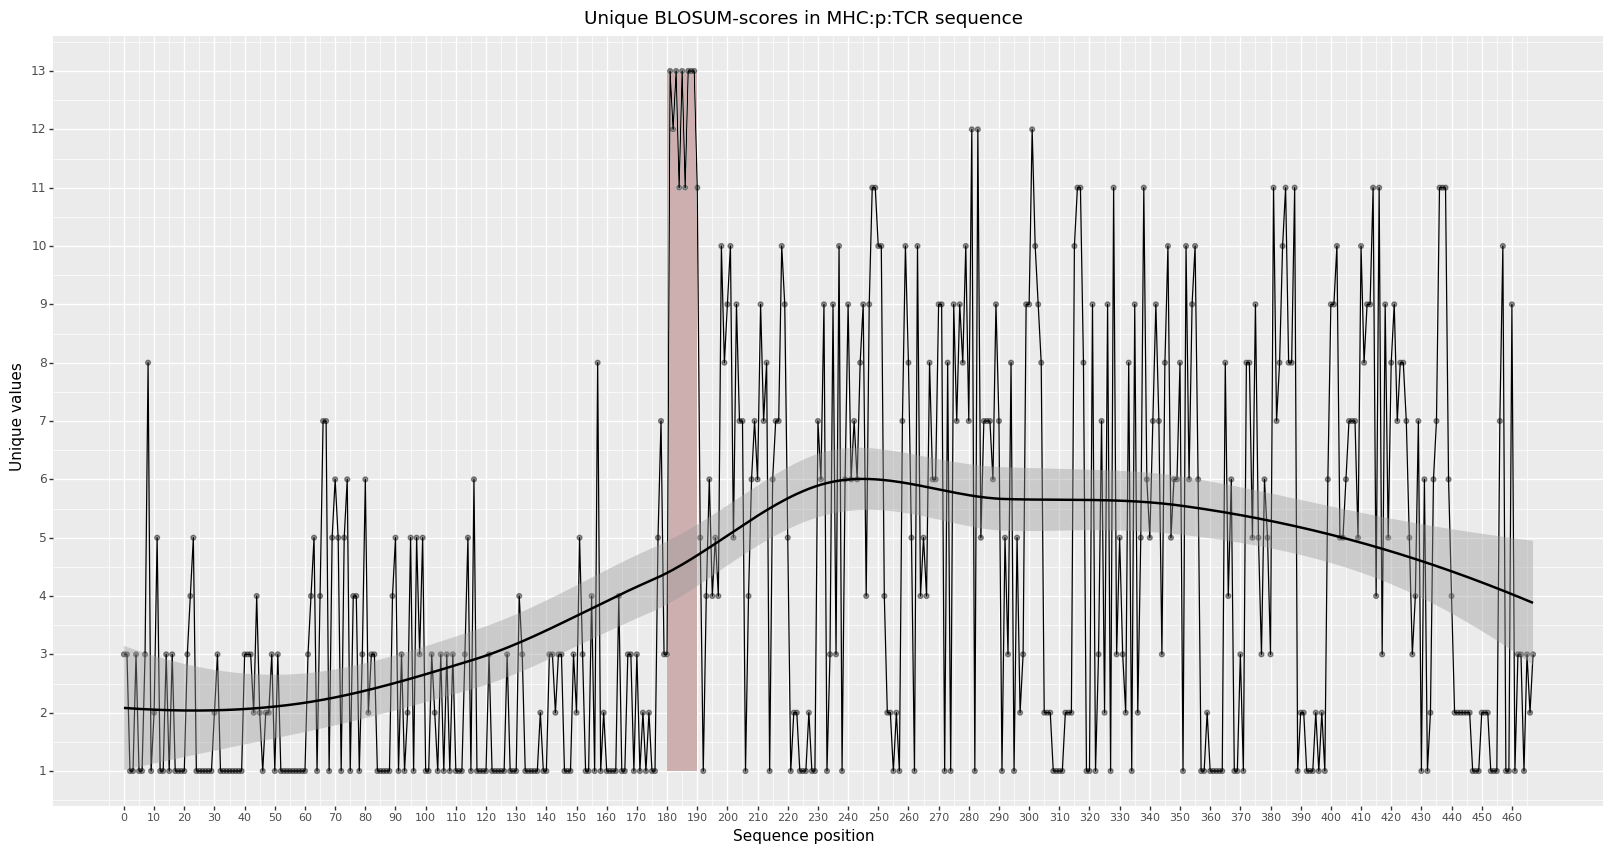

<ggplot: (-9223363263864010180)>

In [999]:
(ggplot(df, aes("1", "2"))
    + geom_point(alpha = 0.4)
    + scale_x_continuous(breaks=range(0, 467, 10))
    + scale_y_continuous(breaks=range(0, 15, 1))
#    + geom_jitter()
#    + geom_area()
#    + geom_polygon()
    + geom_line()
    + geom_rect(xmin = 180, xmax = 190, ymin = 1, ymax = 13, alpha = 0.002, fill = "#ceafaf")
    + theme(axis_text_x=element_text(size = 8))
    + theme(figure_size =(20,10))
    + stat_smooth(se=True, method='loess')
    + ggtitle("Unique BLOSUM-scores in MHC:p:TCR sequence")
    + xlab("Sequence position")
    + ylab("Unique values")
)

In [922]:
df = pd.DataFrame({"1":all_energy.nunique().index, "2":all_energy.nunique()})
#df.iloc[:,0] = pd.to_numeric(df.iloc[:,0])
df.dtypes

1    object
2     int64
dtype: object

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:80: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "


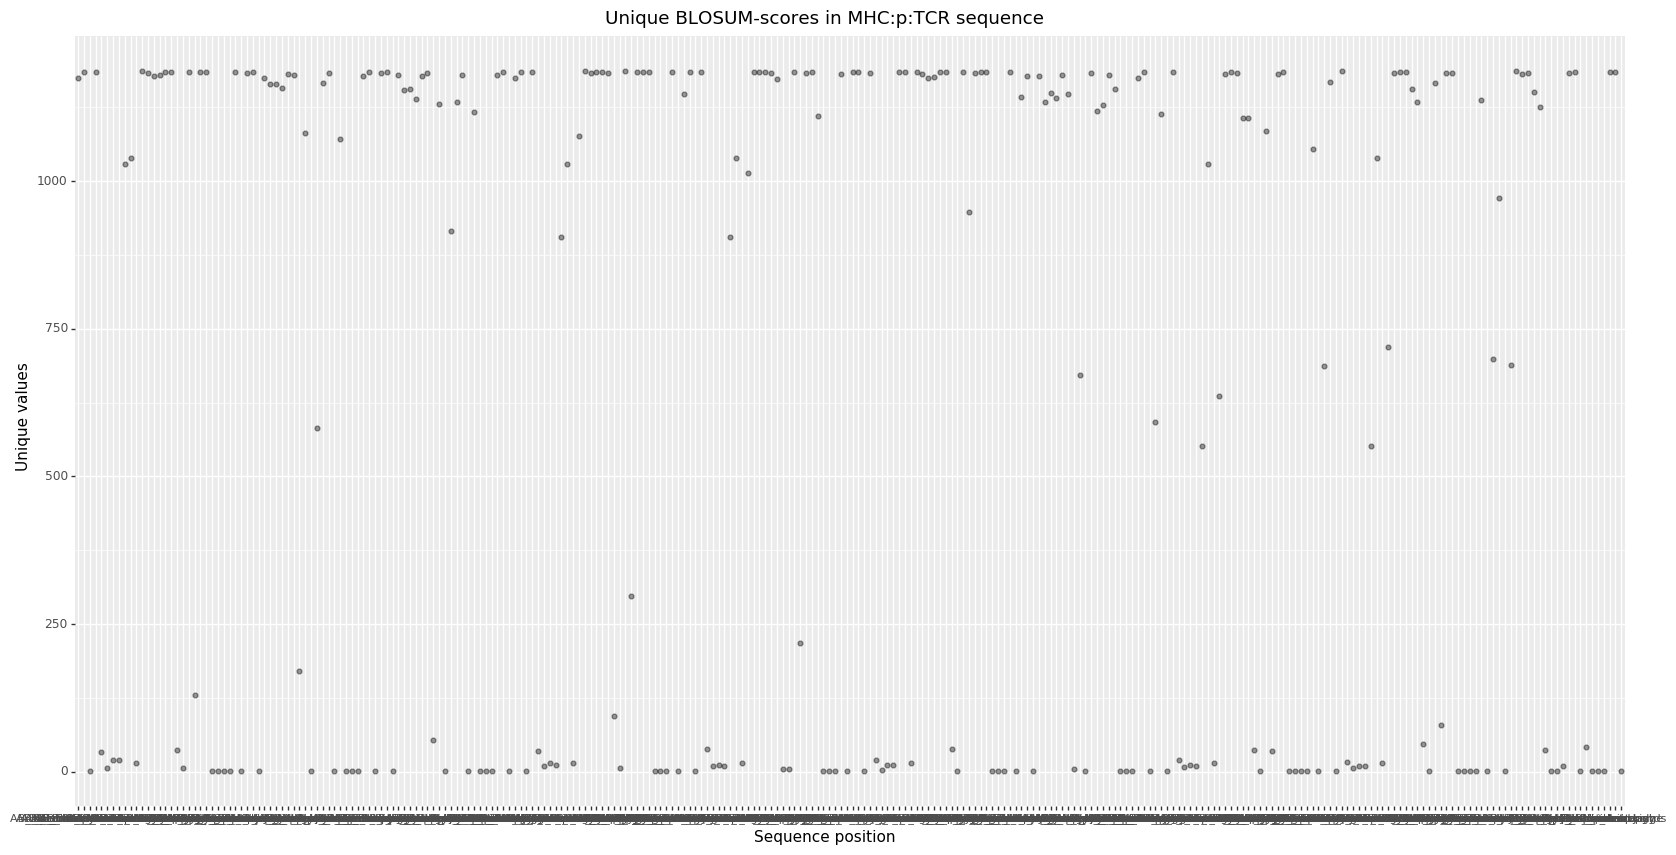

<ggplot: (-9223363263934786111)>

In [860]:
(ggplot(df, aes("1", "2"))
    + geom_point(alpha = 0.4)
#    + scale_x_continuous(breaks=range(0, 467, 10))
#    + scale_y_continuous(breaks=range(0, 15, 1))
#    + geom_jitter()
#    + geom_area()
#    + geom_polygon()
    + geom_line()
#    + geom_rect(xmin = 180, xmax = 190, ymin = 1, ymax = 13, alpha = 0.002, fill = "#ceafaf")
    + theme(axis_text_x=element_text(size = 8))
    + theme(figure_size =(20,10))
    + stat_smooth(se=True, method='loess')
    + ggtitle("Unique BLOSUM-scores in MHC:p:TCR sequence")
    + xlab("Sequence position")
    + ylab("Unique values")
)

In [959]:
all_energy

M_total energy  M_Backbone Hbond  \
key_0                                                          
1g6r_1p_P1_1t_99s_pMHC-TCR         43.8599          -121.401   
1g6r_1p_N1_1t_99s_pMHC-TCR         33.0047          -130.811   
1g6r_1p_N2_1t_99s_pMHC-TCR         32.7762          -132.186   
1g6r_1p_N3_1t_99s_pMHC-TCR         25.6722          -133.606   
1g6r_1p_R1_1t_99s_pMHC-TCR         26.2620          -130.927   
1g6r_1p_S1_1t_99s_pMHC-TCR         42.5881          -127.009   
1g6r_1p_P1_1t_95s_pMHC-TCR         47.9869          -122.997   
1g6r_1p_N1_1t_95s_pMHC-TCR         35.6672          -131.487   
1g6r_1p_N2_1t_95s_pMHC-TCR         43.3983          -127.784   
1g6r_1p_N3_1t_95s_pMHC-TCR         34.7800          -130.817   
1g6r_1p_R1_1t_95s_pMHC-TCR         20.7450          -135.223   
1g6r_1p_S1_1t_95s_pMHC-TCR         42.5881          -127.009   
1g6r_1p_P1_1t_90s_pMHC-TCR         38.0777          -123.242   
1g6r_1p_N1_1t_90s_pMHC-TCR         32.0869          -134.871   
1g6r_1p_N2_1t_90s_pMHC-TCR         36.0466          -131.451   
1g6r_1p_N3_1t_90s_pMHC-TCR         23.7637          -135.817   
1g6r_1p_R1_1t_90s_pMHC-TCR         21.3380          -130.800   
1g6r_1p_S1_1t_90s_pMHC-TCR         42.5881          -127.009   
1g6r_1p_P1_1t_80s_pMHC-TCR         61.4802          -116.470   
1g6r_1p_N1_1t_80s_pMHC-TCR         32.6174          -136.964   
1g6r_1p_N2_1t_80s_pMHC-TCR         24.0108          -138.908   
1g6r_1p_N3_1t_80s_pMHC-TCR         29.6723          -138.857   
1g6r_1p_R1_1t_80s_pMHC-TCR         19.5764          -144.339   
1g6r_1p_S1_1t_80s_pMHC-TCR         46.4203          -122.153   
1mwa_1p_P1_1t_99s_pMHC-TCR         59.4287          -126.307   
1mwa_1p_N1_1t_99s_pMHC-TCR         36.6789          -135.752   
1mwa_1p_N2_1t_99s_pMHC-TCR         28.8329          -133.609   
1mwa_1p_N3_1t_99s_pMHC-TCR         39.6564          -132.069   
1mwa_1p_R1_1t_99s_pMHC-TCR         41.5657          -132.137   
1mwa_1p_S1_1t_99s_pMHC-TCR         63.7752          -128.563   
...                                    ...               ...   
5hho_4p_P1_1t_80s_pMHC-TCR         43.1022          -138.241   
5hho_4p_N1_1t_80s_pMHC-TCR         26.9029          -145.370   
5hho_4p_N2_1t_80s_pMHC-TCR         20.4134          -142.530   
5hho_4p_N3_1t_80s_pMHC-TCR         32.6884          -137.850   
5hho_4p_R1_1t_80s_pMHC-TCR         23.0201          -140.478   
5hho_4p_S1_1t_80s_pMHC-TCR         56.5885          -138.563   
5men_0p_P1_1t_99s_pMHC-TCR         34.3450          -137.366   
5men_0p_N1_1t_99s_pMHC-TCR         43.5015          -133.924   
5men_0p_N2_1t_99s_pMHC-TCR         40.9215          -139.249   
5men_0p_N3_1t_99s_pMHC-TCR         36.6938          -136.107   
5men_0p_R1_1t_99s_pMHC-TCR         37.4091          -140.261   
5men_0p_S1_1t_99s_pMHC-TCR         57.1499          -135.640   
5men_0p_P1_1t_95s_pMHC-TCR         31.3410          -133.143   
5men_0p_N1_1t_95s_pMHC-TCR         42.8556          -139.943   
5men_0p_N2_1t_95s_pMHC-TCR         35.5864          -138.738   
5men_0p_N3_1t_95s_pMHC-TCR         37.0827          -136.312   
5men_0p_R1_1t_95s_pMHC-TCR         33.9896          -138.572   
5men_0p_S1_1t_95s_pMHC-TCR         28.7505          -135.379   
5men_0p_P1_1t_90s_pMHC-TCR         41.5823          -133.021   
5men_0p_N1_1t_90s_pMHC-TCR         32.3616          -142.582   
5men_0p_N2_1t_90s_pMHC-TCR         22.2436          -141.849   
5men_0p_N3_1t_90s_pMHC-TCR         37.7567          -135.491   
5men_0p_R1_1t_90s_pMHC-TCR         31.3661          -140.749   
5men_0p_S1_1t_90s_pMHC-TCR         27.1967          -136.590   
5men_0p_P1_1t_80s_pMHC-TCR         40.4614          -137.219   
5men_0p_N1_1t_80s_pMHC-TCR         36.9587          -144.033   
5men_0p_N2_1t_80s_pMHC-TCR         31.5761          -141.021   
5men_0p_N3_1t_80s_pMHC-TCR         40.1811          -136.156   
5men_0p_R1_1t_80s_pMHC-TCR         36.1609          -133.004   
5men_0p_S1_1t_80s_pMHC-TCR         42.2487          -137.275

In [1211]:
# Removing peptide
df_raw_nopep = df_raw.copy() #already contains y_true
df_raw_energy = all_energy.copy() #need to add y_true




In [1212]:
df_raw_energy

M_total energy  M_Backbone Hbond  \
key_0                                                          
1g6r_1p_P1_1t_99s_pMHC-TCR         43.8599          -121.401   
1g6r_1p_N1_1t_99s_pMHC-TCR         33.0047          -130.811   
1g6r_1p_N2_1t_99s_pMHC-TCR         32.7762          -132.186   
1g6r_1p_N3_1t_99s_pMHC-TCR         25.6722          -133.606   
1g6r_1p_R1_1t_99s_pMHC-TCR         26.2620          -130.927   
1g6r_1p_S1_1t_99s_pMHC-TCR         42.5881          -127.009   
1g6r_1p_P1_1t_95s_pMHC-TCR         47.9869          -122.997   
1g6r_1p_N1_1t_95s_pMHC-TCR         35.6672          -131.487   
1g6r_1p_N2_1t_95s_pMHC-TCR         43.3983          -127.784   
1g6r_1p_N3_1t_95s_pMHC-TCR         34.7800          -130.817   
1g6r_1p_R1_1t_95s_pMHC-TCR         20.7450          -135.223   
1g6r_1p_S1_1t_95s_pMHC-TCR         42.5881          -127.009   
1g6r_1p_P1_1t_90s_pMHC-TCR         38.0777          -123.242   
1g6r_1p_N1_1t_90s_pMHC-TCR         32.0869          -134.871   
1g6r_1p_N2_1t_90s_pMHC-TCR         36.0466          -131.451   
1g6r_1p_N3_1t_90s_pMHC-TCR         23.7637          -135.817   
1g6r_1p_R1_1t_90s_pMHC-TCR         21.3380          -130.800   
1g6r_1p_S1_1t_90s_pMHC-TCR         42.5881          -127.009   
1g6r_1p_P1_1t_80s_pMHC-TCR         61.4802          -116.470   
1g6r_1p_N1_1t_80s_pMHC-TCR         32.6174          -136.964   
1g6r_1p_N2_1t_80s_pMHC-TCR         24.0108          -138.908   
1g6r_1p_N3_1t_80s_pMHC-TCR         29.6723          -138.857   
1g6r_1p_R1_1t_80s_pMHC-TCR         19.5764          -144.339   
1g6r_1p_S1_1t_80s_pMHC-TCR         46.4203          -122.153   
1mwa_1p_P1_1t_99s_pMHC-TCR         59.4287          -126.307   
1mwa_1p_N1_1t_99s_pMHC-TCR         36.6789          -135.752   
1mwa_1p_N2_1t_99s_pMHC-TCR         28.8329          -133.609   
1mwa_1p_N3_1t_99s_pMHC-TCR         39.6564          -132.069   
1mwa_1p_R1_1t_99s_pMHC-TCR         41.5657          -132.137   
1mwa_1p_S1_1t_99s_pMHC-TCR         63.7752          -128.563   
...                                    ...               ...   
5hho_4p_P1_1t_80s_pMHC-TCR         43.1022          -138.241   
5hho_4p_N1_1t_80s_pMHC-TCR         26.9029          -145.370   
5hho_4p_N2_1t_80s_pMHC-TCR         20.4134          -142.530   
5hho_4p_N3_1t_80s_pMHC-TCR         32.6884          -137.850   
5hho_4p_R1_1t_80s_pMHC-TCR         23.0201          -140.478   
5hho_4p_S1_1t_80s_pMHC-TCR         56.5885          -138.563   
5men_0p_P1_1t_99s_pMHC-TCR         34.3450          -137.366   
5men_0p_N1_1t_99s_pMHC-TCR         43.5015          -133.924   
5men_0p_N2_1t_99s_pMHC-TCR         40.9215          -139.249   
5men_0p_N3_1t_99s_pMHC-TCR         36.6938          -136.107   
5men_0p_R1_1t_99s_pMHC-TCR         37.4091          -140.261   
5men_0p_S1_1t_99s_pMHC-TCR         57.1499          -135.640   
5men_0p_P1_1t_95s_pMHC-TCR         31.3410          -133.143   
5men_0p_N1_1t_95s_pMHC-TCR         42.8556          -139.943   
5men_0p_N2_1t_95s_pMHC-TCR         35.5864          -138.738   
5men_0p_N3_1t_95s_pMHC-TCR         37.0827          -136.312   
5men_0p_R1_1t_95s_pMHC-TCR         33.9896          -138.572   
5men_0p_S1_1t_95s_pMHC-TCR         28.7505          -135.379   
5men_0p_P1_1t_90s_pMHC-TCR         41.5823          -133.021   
5men_0p_N1_1t_90s_pMHC-TCR         32.3616          -142.582   
5men_0p_N2_1t_90s_pMHC-TCR         22.2436          -141.849   
5men_0p_N3_1t_90s_pMHC-TCR         37.7567          -135.491   
5men_0p_R1_1t_90s_pMHC-TCR         31.3661          -140.749   
5men_0p_S1_1t_90s_pMHC-TCR         27.1967          -136.590   
5men_0p_P1_1t_80s_pMHC-TCR         40.4614          -137.219   
5men_0p_N1_1t_80s_pMHC-TCR         36.9587          -144.033   
5men_0p_N2_1t_80s_pMHC-TCR         31.5761          -141.021   
5men_0p_N3_1t_80s_pMHC-TCR         40.1811          -136.156   
5men_0p_R1_1t_80s_pMHC-TCR         36.1609          -133.004   
5men_0p_S1_1t_80s_pMHC-TCR         42.2487          -137.275

In [1213]:
#Create column of zeroes (negative complexes)
zeroes = np.zeros((len(df_raw_energy),1))
zeroes = pd.DataFrame(zeroes).set_index(df_raw_energy.index)

#Merge zeroes on the right of complex_df
df = pd.merge(df_raw_energy, zeroes, on = df_raw_energy.index);
df = df.rename(columns={0 : "y_true"})

#Change zero to 1 (true complex) for all true complexes
changes = df[df.iloc[:,0].str.contains("_P")].index
df.loc[changes, "y_true"] = 1

df_raw_energy = df.copy(deep = False)

In [1214]:
df_raw_energy = df_raw_energy.set_index(df_raw_energy.key_0).drop("key_0", axis = 1)
df_raw_energy = df_raw_energy.drop(labels = ["M_intface", "A_intface", "B_intface", "P_intface"], axis = 1)

In [1215]:
#Merge raw all
df_raw_all = pd.merge(df_raw.drop("y_true", axis = 1), df_raw_energy, on = df_raw.index)

In [1216]:
df_raw_all = df_raw_all.set_index(df_raw_all.key_0).drop("key_0", axis = 1)

In [1217]:
# Remove peptide blosum scores in df_raw_nopep and raw_all_nopep
df_raw_nopep.iloc[:,180:191] = np.zeros(shape = (1464,11))

#Raw all nopep
df_raw_all_nopep = df_raw_all.copy(deep = False)
#df_raw_all_nopep = df_raw_all_nopep.set_index(df_raw_all_nopep.key_0).drop("key_0", axis = 1)
df_raw_all_nopep.iloc[:,180:191] = np.zeros(shape = (1464,11))

In [1218]:
#Convert dataframes to numeric
df_raw_energy = df_raw_energy.apply(pd.to_numeric)
df_raw_all = df_raw_all.apply(pd.to_numeric)
df_raw_all_nopep = df_raw_all_nopep.apply(pd.to_numeric)

In [1219]:
#all
remove99 = df_raw[df_raw.index.str.contains("99s")].index
remove95 = df_raw[df_raw.index.str.contains("95s")].index
remove90 = df_raw[df_raw.index.str.contains("90s")].index

#all
df_99 = df_raw
df_95 = df_raw.drop(index = remove99, axis = 0)
df_90 = df_95.drop(index = remove95, axis = 0)
df_80 = df_90.drop(index = remove90, axis = 0)

#nopep
remove99_nopep = df_raw_nopep[df_raw_nopep.index.str.contains("99s")].index
remove95_nopep = df_raw_nopep[df_raw_nopep.index.str.contains("95s")].index
remove90_nopep = df_raw_nopep[df_raw_nopep.index.str.contains("90s")].index

#nopep
df_99_nopep = df_raw_nopep
df_95_nopep = df_raw_nopep.drop(index = remove99_nopep, axis = 0)
df_90_nopep = df_95_nopep.drop(index = remove95_nopep, axis = 0)
df_80_nopep = df_90_nopep.drop(index = remove90_nopep, axis = 0)

#all_energy
remove99_energy = df_raw_energy[df_raw_energy.index.str.contains("99s")].index
remove95_energy = df_raw_energy[df_raw_energy.index.str.contains("95s")].index
remove90_energy = df_raw_energy[df_raw_energy.index.str.contains("90s")].index

#all_energy
df_99_energy = df_raw_energy
df_95_energy = df_raw_energy.drop(index = remove99_energy, axis = 0)
df_90_energy = df_95_energy.drop(index = remove95_energy, axis = 0)
df_80_energy = df_90_energy.drop(index = remove90_energy, axis = 0)

In [1220]:
#all combined
remove99_all = df_raw_all[df_raw_all.index.str.contains("99s")].index
remove95_all = df_raw_all[df_raw_all.index.str.contains("95s")].index
remove90_all = df_raw_all[df_raw_all.index.str.contains("90s")].index

#all combined
df_99_all = df_raw_all
df_95_all = df_raw_all.drop(index = remove99_all, axis = 0)
df_90_all = df_95_all.drop(index = remove95_all, axis = 0)
df_80_all = df_90_all.drop(index = remove90_all, axis = 0)

In [1221]:
#all_nopep combined
remove99_all_nopep = df_raw_all_nopep[df_raw_all_nopep.index.str.contains("99s")].index
remove95_all_nopep = df_raw_all_nopep[df_raw_all_nopep.index.str.contains("95s")].index
remove90_all_nopep = df_raw_all_nopep[df_raw_all_nopep.index.str.contains("90s")].index

#all_nopep combined
df_99_all_nopep = df_raw_all_nopep
df_95_all_nopep = df_raw_all_nopep.drop(index = remove99_all_nopep, axis = 0)
df_90_all_nopep = df_95_all_nopep.drop(index = remove95_all_nopep, axis = 0)
df_80_all_nopep = df_90_all_nopep.drop(index = remove90_all_nopep, axis = 0)

In [1222]:
df_raw.shape, df_95.shape, df_90.shape, df_80.shape

((1464, 469), (1098, 469), (732, 469), (366, 469))

## Random forest

In [1223]:
#complex
y_99 = df_raw.y_true
y_95 = df_95.y_true
y_90 = df_90.y_true
y_80 = df_80.y_true

#complex
df_99 = df_raw.drop("y_true", axis = 1)
df_95 = df_95.drop("y_true", axis = 1)
df_90 = df_90.drop("y_true", axis = 1)
df_80 = df_80.drop("y_true", axis = 1)



In [1224]:
#nopep
y_99_nopep = df_raw_nopep.y_true
y_95_nopep = df_95_nopep.y_true
y_90_nopep = df_90_nopep.y_true
y_80_nopep = df_80_nopep.y_true

#nopep
df_99_nopep = df_raw_nopep.drop("y_true", axis = 1)
df_95_nopep = df_95_nopep.drop("y_true", axis = 1)
df_90_nopep = df_90_nopep.drop("y_true", axis = 1)
df_80_nopep = df_80_nopep.drop("y_true", axis = 1)



In [1225]:
#energy
y_99_energy = df_raw_energy.y_true
y_95_energy = df_95_energy.y_true
y_90_energy = df_90_energy.y_true
y_80_energy = df_80_energy.y_true

#energy
df_99_energy = df_raw_energy.drop("y_true", axis = 1)
df_95_energy = df_95_energy.drop("y_true", axis = 1)
df_90_energy = df_90_energy.drop("y_true", axis = 1)
df_80_energy = df_80_energy.drop("y_true", axis = 1)

In [1226]:
#all combined
y_99_all = df_raw_all.y_true
y_95_all = df_95_all.y_true
y_90_all = df_90_all.y_true
y_80_all = df_80_all.y_true

#all combined
df_99_all = df_raw_all.drop("y_true", axis = 1)
df_95_all = df_95_all.drop("y_true", axis = 1)
df_90_all = df_90_all.drop("y_true", axis = 1)
df_80_all = df_80_all.drop("y_true", axis = 1)

In [1227]:
#all_nopep combined
y_99_all_nopep = df_raw_all_nopep.y_true
y_95_all_nopep = df_95_all_nopep.y_true
y_90_all_nopep = df_90_all_nopep.y_true
y_80_all_nopep = df_80_all_nopep.y_true

#all_nopep combined
df_99_all_nopep = df_raw_all_nopep.drop("y_true", axis = 1)
df_95_all_nopep = df_95_all_nopep.drop("y_true", axis = 1)
df_90_all_nopep = df_90_all_nopep.drop("y_true", axis = 1)
df_80_all_nopep = df_80_all_nopep.drop("y_true", axis = 1)

In [1228]:
y_99.shape, y_95.shape, y_90.shape, y_80.shape

((1464,), (1098,), (732,), (366,))

In [1229]:
df_99.shape, df_95.shape, df_90.shape, df_80.shape

((1464, 468), (1098, 468), (732, 468), (366, 468))

In [1231]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_99, y_99)
m.score(df_99, y_99)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9915409836065574

## Split vals

In [1232]:
df, y = df_99, y_99

In [1233]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = int(len(df) / 5)  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1172, 468), (1172,), (292, 468))

In [1234]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_")
    print(res)
    y_hat = np.where(m.predict(X_valid) <= 0.5, 0, 1)
    
    print("MCC:", metrics.matthews_corrcoef(y_valid, y_hat))
    print("AP:",  metrics.average_precision_score(y_valid, y_hat))
    tn, fp, fn, tp = metrics.confusion_matrix(y_valid, y_hat).ravel()
    print("True positive rate:", tp/(tp+fn))
    print("True negative rate:", tn/(fp+tn))
    print("Confusion matrix:\n", metrics.confusion_matrix(y_valid, y_hat))
    print("tn, fp, fn, tp")

### Defining lists of dataframes and ys

In [1235]:
#Normal dataset
dfs, ys, names = [df_99, df_95, df_90, df_80], [y_99, y_95, y_90, y_80], ["99%", "95%", "90%", "80%"]

#Dataset with peptide "removed" -> set to 0
dfs_nopep, ys_nopep, names_nopep = [df_99_nopep, df_95_nopep, df_90_nopep, df_80_nopep], [y_99_nopep, y_95_nopep, y_90_nopep, y_80_nopep], ["99%", "95%", "90%", "80%"]

#Energy terms
dfs_energy, ys_energy, names_energy = [df_99_energy, df_95_energy, df_90_energy, df_80_energy], [y_99_energy, y_95_energy, y_90_energy, y_80_energy], ["99%", "95%", "90%", "80%"]

#All comb terms
dfs_all, ys_all, names_all = [df_99_all, df_95_all, df_90_all, df_80_all], [y_99_all, y_95_all, y_90_all, y_80_all], ["99%", "95%", "90%", "80%"]

#All nopep terms
dfs_all_nopep, ys_all_nopep, names_all_nopep = [df_99_all_nopep, df_95_all_nopep, df_90_all_nopep, df_80_all_nopep], [y_99_all_nopep, y_95_all_nopep, y_90_all_nopep, y_80_all_nopep], ["99%", "95%", "90%", "80%"]




### Complex BLOSUM score dataset full

In [1236]:
for df, y, names in zip(dfs, ys, names):
    print(names)
    m = RandomForestRegressor(n_jobs=-1)
    %time m.fit(df, y)
    print_score(m)

99%
CPU times: user 246 ms, sys: 3.66 ms, total: 250 ms
Wall time: 115 ms


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.03648366785943837, 0.03881815702823221, 0.9904424556707929, 0.9890300546448088]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[244   0]
 [  0  48]]
tn, fp, fn, tp
95%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 222 ms, sys: 8.33 ms, total: 230 ms
Wall time: 113 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.06352823134224969, 0.08213753917951132, 0.9710210354633657, 0.9508845628415301]
MCC: 0.9875069964446889
AP: 0.9825913242009132
True positive rate: 0.9791666666666666
True negative rate: 1.0
Confusion matrix:
 [[244   0]
 [  1  47]]
tn, fp, fn, tp
90%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 181 ms, sys: 4.9 ms, total: 186 ms
Wall time: 111 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.08272244805957615, 0.13996085558430404, 0.950864419538307, 0.8573907103825137]
MCC: 0.9111628523276832
AP: 0.8731418061897515
True positive rate: 0.8958333333333334
True negative rate: 0.9918032786885246
Confusion matrix:
 [[242   2]
 [  5  43]]
tn, fp, fn, tp
80%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 118 ms, sys: 4.41 ms, total: 122 ms
Wall time: 110 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.24082126265360185, 0.266059525732263, 0.5835728922716628, 0.4846618852459015]
MCC: 0.674702809092281
AP: 0.5821917808219178
True positive rate: 0.5
True negative rate: 1.0
Confusion matrix:
 [[244   0]
 [ 24  24]]
tn, fp, fn, tp


### Complex BLOSUM dataset with peptide blosum set to 0 

In [1237]:
for df, y, names in zip(dfs_nopep, ys_nopep, names_nopep):
    print(names)
    m = RandomForestRegressor(n_jobs=-1)
    %time m.fit(df, y)
    print_score(m)

99%
CPU times: user 325 ms, sys: 4.18 ms, total: 330 ms
Wall time: 115 ms


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.30131784564372965, 0.30433195480231745, 0.34807288944204107, 0.32573634507398974]
MCC: 0.48240765318082235
AP: 0.3902907954818553
True positive rate: 0.3333333333333333
True negative rate: 0.9877049180327869
Confusion matrix:
 [[241   3]
 [ 32  16]]
tn, fp, fn, tp
95%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 249 ms, sys: 8.29 ms, total: 258 ms
Wall time: 113 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.30531319613678937, 0.3045326897414298, 0.33066969998958695, 0.3248465738297708]
MCC: 0.48668041420166375
AP: 0.39069634703196343
True positive rate: 0.2708333333333333
True negative rate: 1.0
Confusion matrix:
 [[244   0]
 [ 35  13]]
tn, fp, fn, tp
90%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 217 ms, sys: 8.92 ms, total: 226 ms
Wall time: 111 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.3101298790592167, 0.30876956353063995, 0.3093841301179522, 0.3059294665561413]
MCC: 0.48280419718001116
AP: 0.3886605783866058
True positive rate: 0.2916666666666667
True negative rate: 0.9959016393442623
Confusion matrix:
 [[243   1]
 [ 34  14]]
tn, fp, fn, tp
80%


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 133 ms, sys: 593 µs, total: 133 ms
Wall time: 110 ms
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.33202993376158685, 0.329926766151992, 0.20840359742670933, 0.20755388677009357]
MCC: 0.3632644718823382
AP: 0.2997582594681708
True positive rate: 0.25
True negative rate: 0.9795081967213115
Confusion matrix:
 [[239   5]
 [ 36  12]]
tn, fp, fn, tp


### Dataset with energy terms

In [1238]:
for df, y, names in zip(dfs_energy, ys_energy, names_energy):
    print(names_energy)
    m = RandomForestRegressor(n_jobs=-1)
    %time m.fit(df, y)
    print_score(m)

['99%', '95%', '90%', '80%']


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.15 s, sys: 10.1 ms, total: 2.16 s
Wall time: 314 ms


ValueError: Number of features of the model must match the input. Model n_features is 262 and input n_features is 468 

## Bagging

In [238]:
X_train, y_train = df_99, y_99

In [239]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05743849169214703, 0.06557438524302002, 0.9762459016393442, 0.96904]
MCC: 0.9881652636251156
AP: 0.9803921568627451
True positive rate: 1.0
True negative rate: 0.996
Confusion matrix:
 [[249   1]
 [  0  50]]
tn, fp, fn, tp


In [240]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1.0, 1.0)

In [241]:
preds.shape

(10, 300)

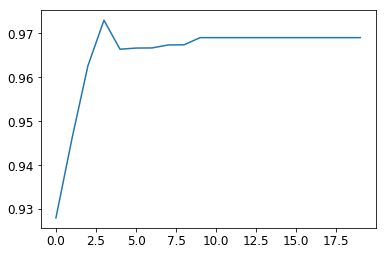

In [242]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [243]:
for df, y in zip(dfs, ys):
    m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
    m.fit(X_train, y_train)
    print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05271812610167519, 0.050104058385191365, 0.9799897540983606, 0.981925]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05108120610837547, 0.055302200076790195, 0.9812131147540984, 0.97798]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.051464216439876816, 0.05259911279353166, 0.9809303278688525, 0.9800799999999998]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.053716869316633914, 0.0550946155868853, 0.9792243852459016, 0.9781450000000002]
MCC: 1.0
AP: 1.0
Tru

## Draw tree

In [148]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.26856485328287016, 0.3368842775869728, 0.4806850209842778, 0.18286468130586397]


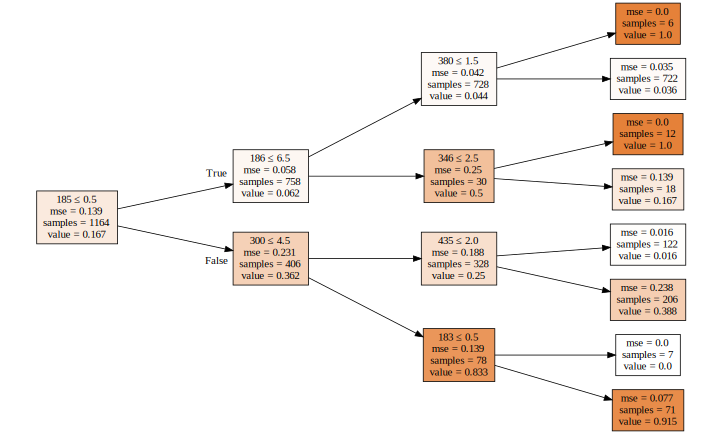

In [149]:
draw_tree(m.estimators_[0], df_trn, precision=3)

## Random forest out of bag validation achieves > 86 % accuracy

In [246]:
for df, y in zip(dfs, ys):
    m = RandomForestRegressor(n_estimators=8, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.06899329776588464, 0.059947894041408996, 0.9657274590163935, 0.974125, 0.8778943766031002]
MCC: 0.9881652636251156
AP: 0.9803921568627451
True positive rate: 1.0
True negative rate: 0.996
Confusion matrix:
 [[249   1]
 [  0  50]]
tn, fp, fn, tp


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05789009985482998, 0.06166103577895309, 0.9758709016393443, 0.972625, 0.8945184705029553]
MCC: 1.0
AP: 1.0
True positive rate: 1.0
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  0  50]]
tn, fp, fn, tp


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.06068048204850835, 0.07252872993970505, 0.9734887295081968, 0.962125, 0.8735803362328538]
MCC: 0.9879755146408642
AP: 0.9833333333333333
True positive rate: 0.98
True negative rate: 1.0
Confusion matrix:
 [[250   0]
 [  1  49]]
tn, fp, fn, tp


/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.0700677852905251, 0.06081049799719344, 0.9646516393442623, 0.973375, 0.8772532201405152]
MCC: 0.9881652636251156
AP: 0.9803921568627451
True positive rate: 1.0
True negative rate: 0.996
Confusion matrix:
 [[249   1]
 [  0  50]]
tn, fp, fn, tp


In [245]:
## OOB error vs after out of bag

## Subsampling for increased accuracy ...

In [263]:
df, y = df_99, y_99

In [264]:
df.shape, y.shape

((1464, 468), (1464,))

In [265]:
df_trn, y_trn = df, y
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [271]:
set_rf_samples(int((1/2)*len(df_trn)))

In [267]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 172 ms, sys: 5.53 ms, total: 178 ms
Wall time: 117 ms
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05076210997263327, 0.22299333487183032, 0.981497574439612, 0.6379918032786884, 0.9075834879298547]
MCC: 0.7347473800380235
AP: 0.6484093366979091
True positive rate: 0.6875
True negative rate: 0.9795081967213115
Confusion matrix:
 [[239   5]
 [ 15  33]]
tn, fp, fn, tp


In [274]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05600177502062544, 0.21424045510299797, 0.9774808020031783, 0.6658529713114754, 0.922332567862484]
MCC: 0.7613942214214917
AP: 0.6838702197488585
True positive rate: 0.6458333333333334
True negative rate: 0.9959016393442623
Confusion matrix:
 [[243   1]
 [ 17  31]]
tn, fp, fn, tp


## Final trees

In [1239]:
X_train.shape

(1172, 468)

In [732]:
dfs, ys, names = [df_99, df_95, df_90, df_80], [y_99, y_95, y_90, y_80], ["99%", "95%", "90%", "80%"]
dfs_nopep, ys_nopep, names_nopep = [df_99_nopep, df_95_nopep, df_90_nopep, df_80_nopep], [y_99_nopep, y_95_nopep, y_90_nopep, y_80_nopep], ["99%", "95%", "90%", "80%"]

In [1240]:
for df, y, name in zip(dfs, ys, names):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=1, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 9
Train x, train y, valid x shape:
 (1220, 468) (1220,) (244, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.03784901338486452, 0.21152137240384591, 0.9897126169201276, 0.673564031862745, 0.8902697132510173]
MCC: 0.8615413635611239
AP: 0.8118852459016394
True positive rate: 0.775
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [  9  31]]
tn, fp, fn, tp

Set: 9
Train x, train y, valid x shape:
 (915, 468) (915,) (183, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.040957535727233464, 0.2227591986765558, 0.9879534295855992, 0.6379564724037764, 0.871584409547918]
MCC: 0.8130873945100312
AP: 0.7491803278688525
True positive rate: 0.7
True negative rate: 1.0
Confusion matrix:
 [[153   0]
 [  9  21]]
tn, fp, fn, tp

Set: %
Train x, train y, valid x shape:
 (610, 468) (610,) (122, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.05674556

In [1241]:
for df, y, name in zip(dfs_nopep, ys_nopep, names_nopep):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=1, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 468) (1220,) (244, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.30104981199639125, 0.3468091806593738, 0.34916259225587476, 0.12245243610745171, 0.04181473739959751]
MCC: 0.4157900382791817
AP: 0.33114754098360655
True positive rate: 0.2
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [ 32   8]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 468) (915,) (183, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.2935369140690074, 0.3392103126485308, 0.3812414195873456, 0.16048668563397817, 0.023094567935910026]
MCC: 0.45037862859033295
AP: 0.3590163934426229
True positive rate: 0.23333333333333334
True negative rate: 1.0
Confusion matrix:
 [[153   0]
 [ 23   7]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 468) (610,) (122, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 

In [1242]:
for df, y, name in zip(dfs_energy, ys_energy, names_energy):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=150, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 262) (1220,) (244, 262)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.08084007915066405, 0.3389827276093671, 0.9530701413548797, 0.1616128104575163, 0.4804675153558563]
MCC: 0.18916507948077682
AP: 0.2046838407494145
True positive rate: 0.1
True negative rate: 0.9852941176470589
Confusion matrix:
 [[201   3]
 [ 36   4]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 262) (915,) (183, 262)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.08689307682573377, 0.34245231542864585, 0.945779173028208, 0.1443627015250546, 0.39845366341126043]
MCC: 0.016327233125332997
AP: 0.1651366120218579
True positive rate: 0.03333333333333333
True negative rate: 0.9738562091503268
Confusion matrix:
 [[149   4]
 [ 29   1]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 262) (610,) (122, 262)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x

In [1279]:
for df, y, name in zip(dfs_all, ys_all, names_all):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((5/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=150, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 730) (1220,) (244, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.10218683556347784, 0.24691502782413155, 0.925013050452027, 0.5551797603485839, 0.7490878504236671]
MCC: 0.7965941325302157
AP: 0.7282786885245902
True positive rate: 0.675
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [ 13  27]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 730) (915,) (183, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.11707153273346813, 0.26656282131032083, 0.9015765929585599, 0.4815717647058825, 0.6795390854233849]
MCC: 0.7458978726096732
AP: 0.6655737704918032
True positive rate: 0.6
True negative rate: 1.0
Confusion matrix:
 [[153   0]
 [ 12  18]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 730) (610,) (122, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.1

In [1283]:
for df, y, name in zip(dfs_all_nopep, ys_all_nopep, names_all_nopep):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=150, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 730) (1220,) (244, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.07551595447779351, 0.3141426589948654, 0.9590481790266414, 0.27998204793028314, 0.5582234563402173]
MCC: 0.40171342165576074
AP: 0.32928464977645305
True positive rate: 0.35
True negative rate: 0.9607843137254902
Confusion matrix:
 [[196   8]
 [ 26  14]]
tn, fp, fn, tp

Set: 95%
Train x, train y, valid x shape:
 (915, 730) (915,) (183, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.07634103651048263, 0.32505382301506497, 0.9581484169054032, 0.22909644153957887, 0.5432559195949346]
MCC: 0.42786365791469405
AP: 0.3473848555815769
True positive rate: 0.3333333333333333
True negative rate: 0.9738562091503268
Confusion matrix:
 [[149   4]
 [ 20  10]]
tn, fp, fn, tp

Set: 90%
Train x, train y, valid x shape:
 (610, 730) (610,) (122, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2

### Currently at > 93 % accuracy ...

## Calculating confidence in tree predictions

In [315]:
df = df_99
df_trn, y_trn = df_99, y_99

n_valid = int(len(df) / 5)  # same as Kaggle's test set size
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [316]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
print("Prediction certainty, standard deviation of predictions:")
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 56 ms, sys: 435 µs, total: 56.4 ms
Wall time: 55.3 ms
Prediction certainty, standard deviation of predictions:


(0.2625, 0.439992897669951)

In [750]:
x = df_99.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

ValueError: Length of values does not match length of index

## Feature importance in complex feature df

In [503]:
df_trn, y_trn = df, y
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
set_rf_samples(1000)
m = RandomForestRegressor(n_estimators=50, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.039529014095047436, 0.18656544874833247, 0.9887496907216496, 0.7493920000000001, 0.9358184599734383]


In [757]:
a = x.sort_values(by = "pred", ascending = False)

KeyError: 'pred'

In [678]:
HTML(DataFrame(a.iloc[0:200, -3:]).to_html())

### Which sequence positions / amino acids matter (in complex)?

In [956]:
for df, y, name in zip(dfs_nopep[0:1], ys_nopep[0:1], names_nopep[0:1]):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=1, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 468) (1220,) (244, 468)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.30110613475779746, 0.35024429776150967, 0.3489190419355901, 0.10498226577670544, 0.031698341411992126]
MCC: 0.4157900382791817
AP: 0.33114754098360655
True positive rate: 0.2
True negative rate: 1.0
Confusion matrix:
 [[204   0]
 [ 32   8]]
tn, fp, fn, tp


In [1099]:
for df, y, name in zip(dfs_energy[0:1], ys_energy[0:1], names_energy[0:1]):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 262) (1220,) (244, 262)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.08245334553209685, 0.33836788835356785, 0.951178361627897, 0.16465134803921555, 0.46819076706564144]
MCC: 0.18916507948077682
AP: 0.2046838407494145
True positive rate: 0.1
True negative rate: 0.9852941176470589
Confusion matrix:
 [[201   3]
 [ 36   4]]
tn, fp, fn, tp


In [1305]:
for df, y, name in zip(dfs_all_nopep[0:1], ys_all_nopep[0:1], names_all_nopep[0:1]):
    df_trn, y_trn = df, y
    
    n_valid = int(len(df) / 6) # validation = 1/6th of set
    n_trn = len(df)-n_valid
    X_train, X_valid = split_vals(df, n_trn)
    y_train, y_valid = split_vals(y, n_trn)
    print("\nSet:", name)
    print("Train x, train y, valid x shape:\n", X_train.shape, y_train.shape, X_valid.shape)
    
    set_rf_samples(int((10/10)*len(df_trn))) #Random forest samples from all of rows (performs better)
    
    
    m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print_score(m)


Set: 99%
Train x, train y, valid x shape:
 (1220, 730) (1220,) (244, 730)
1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.07534717762919124, 0.30637206685915136, 0.9592310276855711, 0.31516203703703705, 0.5596509692767284]
MCC: 0.411340738571511
AP: 0.3368340163934426
True positive rate: 0.375
True negative rate: 0.9558823529411765
Confusion matrix:
 [[195   9]
 [ 25  15]]
tn, fp, fn, tp


In [957]:
y_hat = np.where(m.predict(X_valid) <= 0.5, 0, 1)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [958]:
false_pos = (y_valid == 0) == (y_hat == 1)
X_valid[false_pos]

0  1  2  3  4  5  6  7  8  9  ...  458  459  460  \
key_0                                                     ...                  
5c07_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c08_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c08_1p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c08_1p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c08_1p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c09_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c09_1p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c09_1p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c09_1p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5e9d_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5e9d_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5e9d_0p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5e9d_0p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_80s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_90s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_95s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5eu6_0p_P1_1t_99s_pMHC-TCR -4  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5euo_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hhm_4p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hhm_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5men_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    5   

                            461  462  463  464  465  466  467  
key_0                                                          
5c07_1p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4    1  
5c07_1p_P1_1t_90s_pMHC-TCR    6    5    5    4    4    4    4  
5c07_1p_P1_1t_95s_pMHC-TCR    6    5    5    4    4    4    4  
5c07_1p_P1_1t_99s_pMHC-TCR    6    5    5    4    4    4    4  
5c08_1p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4    1  
5c08_1p_P1_1t_90s_pMHC-TCR    6    5    5    4    4    4    4  
5c08_1p_P1_1t_95s_pMHC-TCR    6    5    5    4    4    4    4  
5c08_1p_P1_1t_99s_pMHC-TCR    6    5    5    4    4    4    4  
5c09_1p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4    1  
5c09_1p_P1_1t_90s_pMHC-TCR    6    5    5    4    4    4    4  
5c09_1p_P1_1t_95s_pMHC-TCR    6    5    5    4    4    4    4  
5c09_1p_P1_1t_99s_pMHC-TCR    6    5    5    4    4    4    4  
5e9d_0p_P1_1t_80s_pMHC-TCR    6    5    5    4    1    4   -4  
5e9d_0p_P1_1t_90s_pMHC-TCR    6    1    5    4    5    4   -4  
5e9d_0p_P1_1t_95s_pMHC-TCR    6    5    5    4    5    4   -4  
5e9d_0p_P1_1t_99s_pMHC-TCR    6    5    5    4    5    4   -4  
5eu6_0p_P1_1t_80s_pMHC-TCR    6    5    1    4    1    4   -4  
5eu6_0p_P1_1t_90s_pMHC-TCR    6    5    1    4    1    4    4  
5eu6_0p_P1_1t_95s_pMHC-TCR 

In [955]:
#true_pos = (y_valid == 1) == (y_hat == 1)
#X_valid[true_pos]

0  1  2  3  4  5  6  7  8  9  ...  458  459  460  \
key_0                                                     ...                  
5c0c_1p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c0c_1p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c0c_1p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c0c_1p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_N1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_N2_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_N3_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_R1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_S1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c07_1p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N2_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N3_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_R1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_S1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_P1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N2_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N3_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_R1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_S1_1t_95s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c07_1p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5c08_1p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
5c08_1p_N1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6   -1   
...                        .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...   
5hho_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5men_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N2_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N3_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_R1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    0   
5men_0p_S1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5men_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N2_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N3_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_R1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    0   
5men_0p_S1_1t_90s_pMHC-TCR  

key_0
5c0c_1p_N2_1t_99s_pMHC-TCR     True
5c0c_1p_N3_1t_99s_pMHC-TCR     True
5c0c_1p_R1_1t_99s_pMHC-TCR     True
5c0c_1p_S1_1t_99s_pMHC-TCR     True
5c07_1p_P1_1t_80s_pMHC-TCR    False
5c07_1p_N1_1t_80s_pMHC-TCR     True
5c07_1p_N2_1t_80s_pMHC-TCR     True
5c07_1p_N3_1t_80s_pMHC-TCR     True
5c07_1p_R1_1t_80s_pMHC-TCR     True
5c07_1p_S1_1t_80s_pMHC-TCR     True
5c07_1p_P1_1t_90s_pMHC-TCR    False
5c07_1p_N1_1t_90s_pMHC-TCR     True
5c07_1p_N2_1t_90s_pMHC-TCR     True
5c07_1p_N3_1t_90s_pMHC-TCR     True
5c07_1p_R1_1t_90s_pMHC-TCR     True
5c07_1p_S1_1t_90s_pMHC-TCR     True
5c07_1p_P1_1t_95s_pMHC-TCR    False
5c07_1p_N1_1t_95s_pMHC-TCR     True
5c07_1p_N2_1t_95s_pMHC-TCR     True
5c07_1p_N3_1t_95s_pMHC-TCR     True
5c07_1p_R1_1t_95s_pMHC-TCR     True
5c07_1p_S1_1t_95s_pMHC-TCR     True
5c07_1p_P1_1t_99s_pMHC-TCR    False
5c07_1p_N1_1t_99s_pMHC-TCR     True
5c07_1p_N2_1t_99s_pMHC-TCR     True
5c07_1p_N3_1t_99s_pMHC-TCR     True
5c07_1p_R1_1t_99s_pMHC-TCR     True
5c07_1p_S1_1t_99s_pMHC

In [936]:
y_valid

key_0
5c0c_1p_N2_1t_99s_pMHC-TCR    0.0
5c0c_1p_N3_1t_99s_pMHC-TCR    0.0
5c0c_1p_R1_1t_99s_pMHC-TCR    0.0
5c0c_1p_S1_1t_99s_pMHC-TCR    0.0
5c07_1p_P1_1t_80s_pMHC-TCR    1.0
5c07_1p_N1_1t_80s_pMHC-TCR    0.0
5c07_1p_N2_1t_80s_pMHC-TCR    0.0
5c07_1p_N3_1t_80s_pMHC-TCR    0.0
5c07_1p_R1_1t_80s_pMHC-TCR    0.0
5c07_1p_S1_1t_80s_pMHC-TCR    0.0
5c07_1p_P1_1t_90s_pMHC-TCR    1.0
5c07_1p_N1_1t_90s_pMHC-TCR    0.0
5c07_1p_N2_1t_90s_pMHC-TCR    0.0
5c07_1p_N3_1t_90s_pMHC-TCR    0.0
5c07_1p_R1_1t_90s_pMHC-TCR    0.0
5c07_1p_S1_1t_90s_pMHC-TCR    0.0
5c07_1p_P1_1t_95s_pMHC-TCR    1.0
5c07_1p_N1_1t_95s_pMHC-TCR    0.0
5c07_1p_N2_1t_95s_pMHC-TCR    0.0
5c07_1p_N3_1t_95s_pMHC-TCR    0.0
5c07_1p_R1_1t_95s_pMHC-TCR    0.0
5c07_1p_S1_1t_95s_pMHC-TCR    0.0
5c07_1p_P1_1t_99s_pMHC-TCR    1.0
5c07_1p_N1_1t_99s_pMHC-TCR    0.0
5c07_1p_N2_1t_99s_pMHC-TCR    0.0
5c07_1p_N3_1t_99s_pMHC-TCR    0.0
5c07_1p_R1_1t_99s_pMHC-TCR    0.0
5c07_1p_S1_1t_99s_pMHC-TCR    0.0
5c08_1p_P1_1t_80s_pMHC-TCR    1.0
5c08_1p_

In [1306]:
fi = rf_feat_importance(m, df_trn); fi[:20]

cols       imp
663      PA_electrostatic kon  0.037544
490            P_total energy  0.028318
558     MP_Interaction Energy  0.027358
692      PB_electrostatic kon  0.019420
557     MP_IntraclashesGroup2  0.018744
651  PA_Solvation Hydrophobic  0.016715
498       P_entropy sidechain  0.015179
259                       259  0.014769
513          A_Backbone Hbond  0.014162
649         PA_Electrostatics  0.014070
678         PB_Electrostatics  0.013599
645     PA_Interaction Energy  0.012828
576      MP_electrostatic kon  0.012040
469          M_Backbone Hbond  0.011843
573           MP_helix dipole  0.011559
653      PA_entropy sidechain  0.011503
643     PA_IntraclashesGroup1  0.011395
672     PB_IntraclashesGroup1  0.010702
542       B_entropy sidechain  0.010518
565  MP_Van der Waals clashes  0.010098

### Feature importance per position / amino acid 

In [1307]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

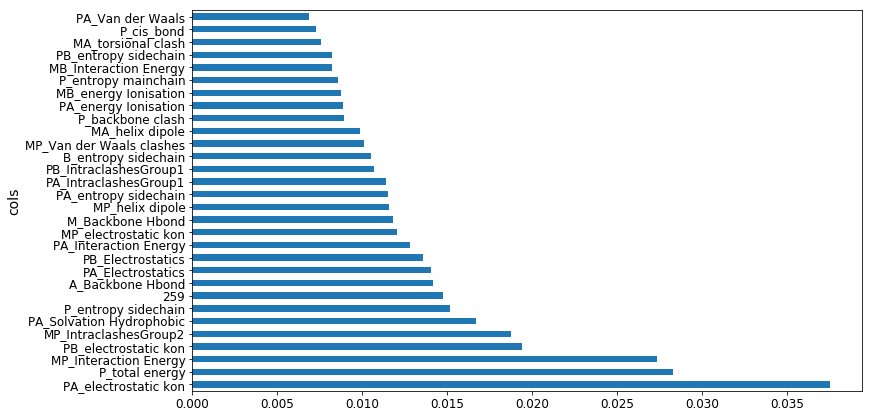

In [1308]:
plot_fi(fi[:30]);

### Peptide accounts for 63 % of feature importance with all features

In [1318]:
fi[0:10].imp.sum()

0.20627885340890492

In [1319]:
print("Number of features that have an importance:")
print(len(fi) - sum(fi.imp == 0))

Number of features that have an importance:
458


In [1320]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

51

In [1321]:
fi[fi.imp>0.003].cols

663        PA_electrostatic kon
490              P_total energy
558       MP_Interaction Energy
692        PB_electrostatic kon
557       MP_IntraclashesGroup2
651    PA_Solvation Hydrophobic
498         P_entropy sidechain
259                         259
513            A_Backbone Hbond
649           PA_Electrostatics
678           PB_Electrostatics
645       PA_Interaction Energy
576        MP_electrostatic kon
469            M_Backbone Hbond
573             MP_helix dipole
653        PA_entropy sidechain
643       PA_IntraclashesGroup1
672       PB_IntraclashesGroup1
542         B_entropy sidechain
565    MP_Van der Waals clashes
602             MA_helix dipole
504            P_backbone clash
665        PA_energy Ionisation
636        MB_energy Ionisation
499         P_entropy mainchain
616       MB_Interaction Energy
682        PB_entropy sidechain
600          MA_torsional clash
502                  P_cis_bond
648            PA_Van der Waals
                 ...           
563     

In [1322]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

### Removing features and testing accuracy

In [1336]:
m = RandomForestRegressor(n_estimators=120, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. R^2 x/y train 4. R^2 x/y valid, 5. m.oob_score_
[0.07678544196890891, 0.31155732134051095, 0.9576597358923884, 0.2917845179738562, 0.5526031111763634]
MCC: 0.49288319362307004
AP: 0.40170239596469104
True positive rate: 0.45
True negative rate: 0.9607843137254902
Confusion matrix:
 [[196   8]
 [ 22  18]]
tn, fp, fn, tp


### Number of features that have any importance: 234 / 469. Removing features < 0.005 importance -> to 38 reduces accuracy from ca 93 -> 89 %

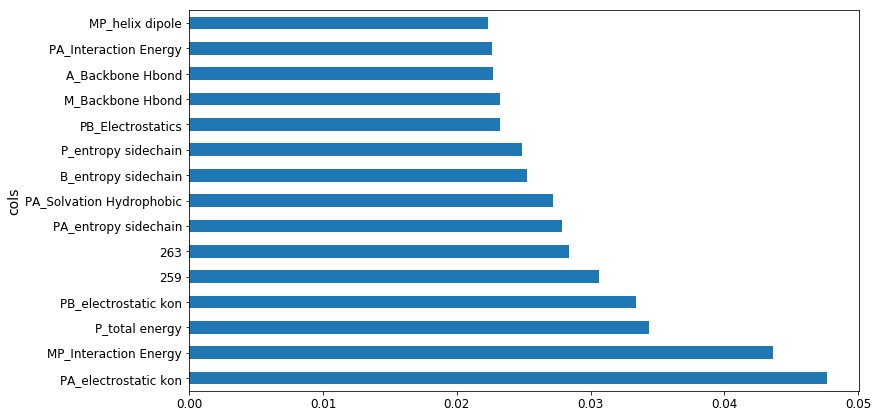

In [1325]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi[0:15]);

In [1326]:
df_keep.shape, df.shape

((1464, 51), (1464, 730))

### Removing co-dependent features?

In [1327]:
from scipy.cluster import hierarchy as hc

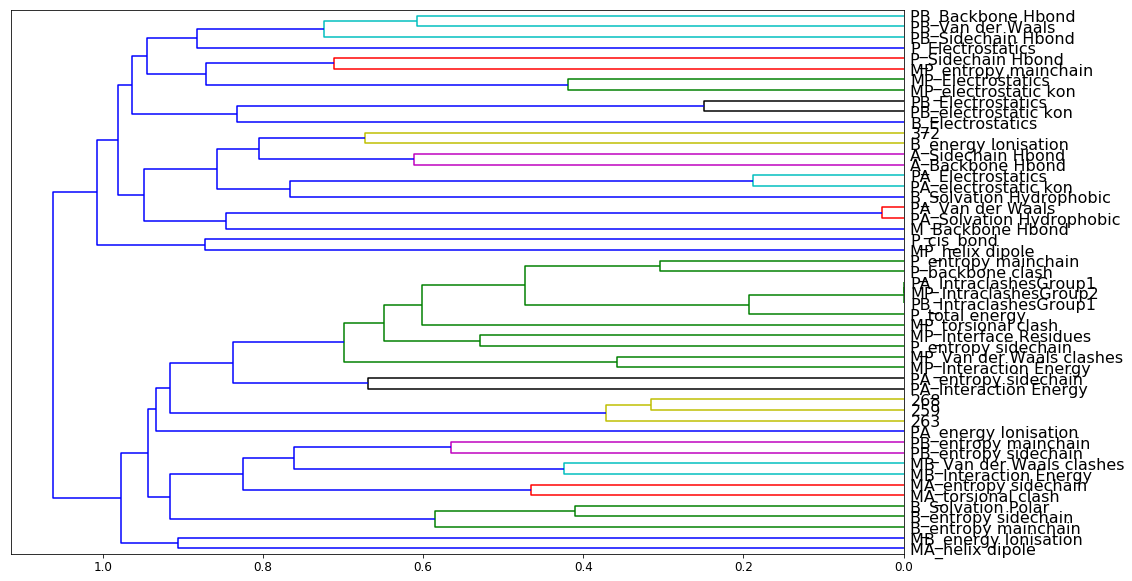

In [1328]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Amino acid do not depend on each other. Thus no need for removal

## Partial dependence

In [1329]:
from pdpbox import pdp
from plotnine import *

In [1332]:
df_trn2, y_trn = df, y
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

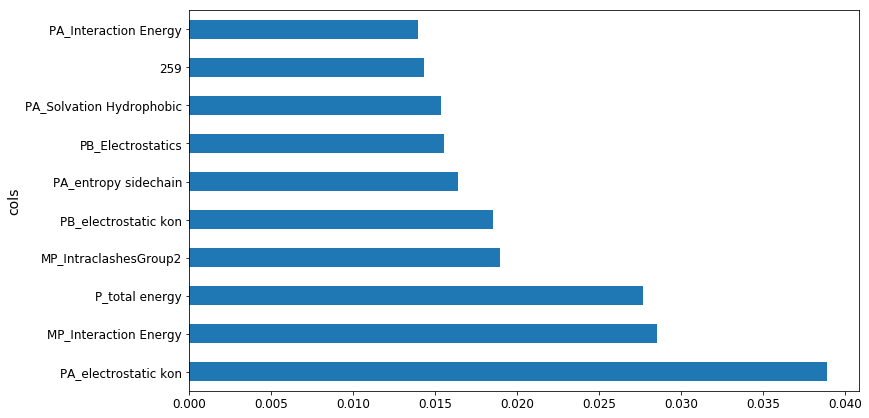

In [1333]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

In [542]:
df

0  1  2  3  4  5  6  7  8  9  ...  458  459  460  \
key_0                                                     ...                  
1g6r_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_P1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N2_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N3_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_R1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_S1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_P1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N2_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N3_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_R1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_S1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_P1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N2_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N3_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_R1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_S1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1mwa_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
...                        .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...   
5hho_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5men_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N2_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N3_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_R1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    0   
5men_0p_S1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5men_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N2_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N3_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_R1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    0   
5men_0p_S1_1t_90s_pMHC-TCR  

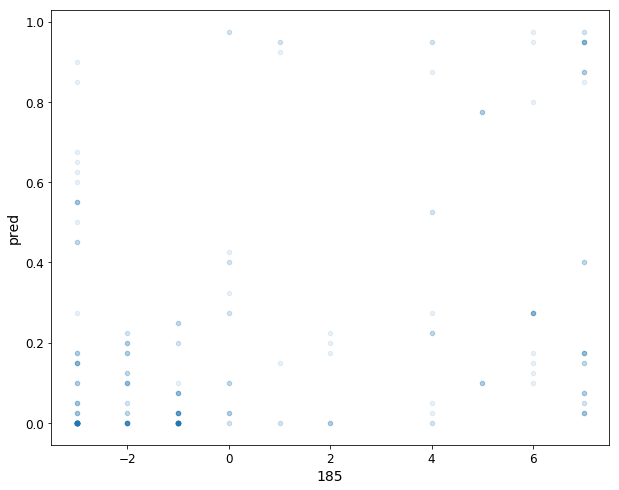

In [547]:
x.plot('185', 'pred', 'scatter', alpha=0.1, figsize=(10,8));

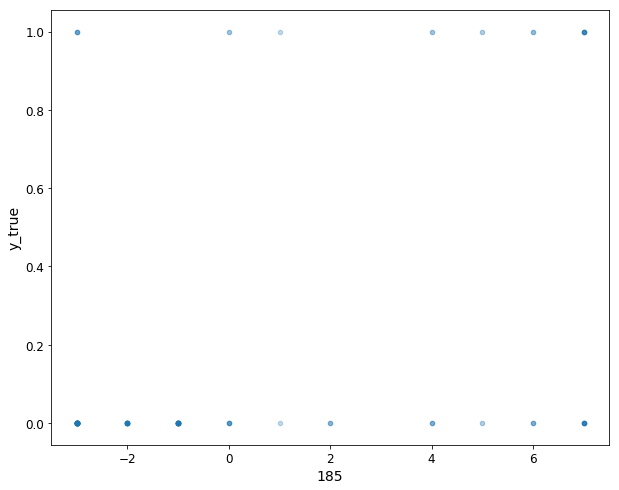

In [548]:
x.plot('185', 'y_true', 'scatter', alpha=0.1, figsize=(10,8));

In [549]:
x_all = get_sample(df_raw, 500)

In [576]:
from skmisc import *
import sys
sys.path.insert(0, "/usr/local/anaconda3/lib/python3.6/site-packages")

In [584]:
fi[0:10]

cols       imp
0   185  0.136056
1   186  0.093633
2   183  0.075726
5   188  0.049391
7   184  0.041288
24  215  0.040571
3   300  0.037237
4   181  0.036819
6   187  0.036319
10  240  0.028995

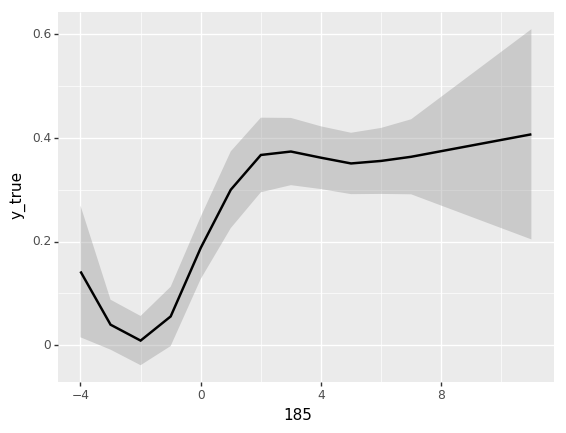

<ggplot: (8766313834255)>

In [585]:
ggplot(x_all, aes('185', 'y_true'))+stat_smooth(se=True, method='loess')

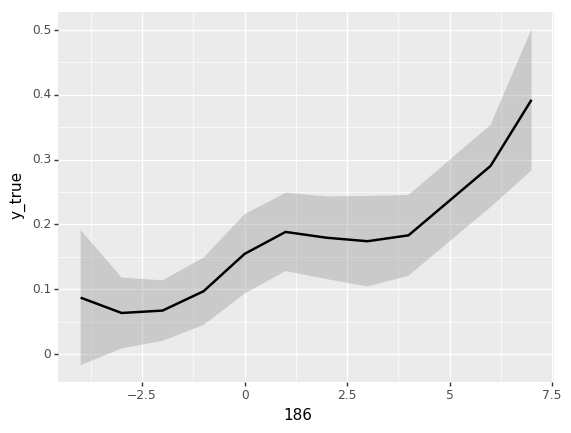

<ggplot: (-9223363270540941971)>

In [586]:
ggplot(x_all, aes('186', 'y_true'))+stat_smooth(se=True, method='loess')

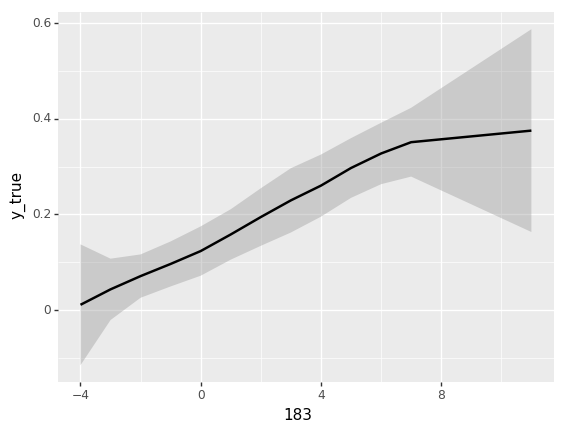

<ggplot: (-9223363270555590284)>

In [587]:
ggplot(x_all, aes('183', 'y_true'))+stat_smooth(se=True, method='loess')

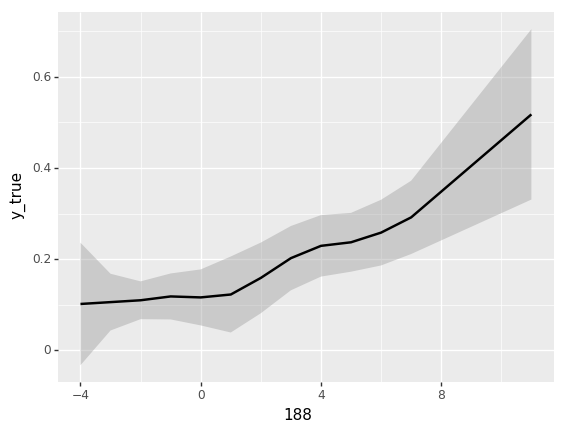

<ggplot: (-9223363270540634908)>

In [588]:
ggplot(x_all, aes('188', 'y_true'))+stat_smooth(se=True, method='loess')

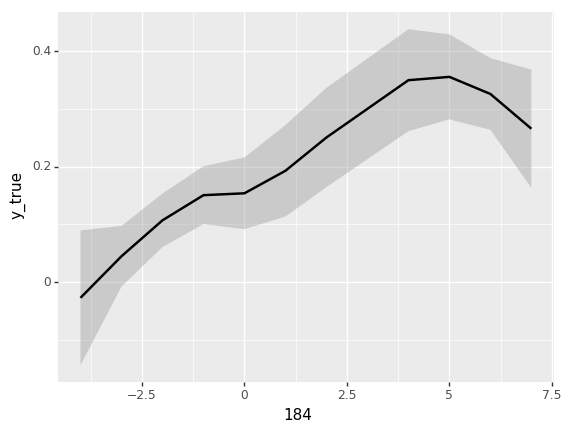

<ggplot: (8766299185640)>

In [589]:
ggplot(x_all, aes('184', 'y_true'))+stat_smooth(se=True, method='loess')

(500, 469)

In [637]:
x = get_sample(X_train, 400)

In [638]:
pdp.pdp_isolate

<function pdpbox.pdp.pdp_isolate(model, dataset, model_features, feature, num_grid_points=10, grid_type='percentile', percentile_range=None, grid_range=None, cust_grid_points=None, memory_limit=0.5, n_jobs=1, predict_kwds=None, data_transformer=None)>

In [639]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b7e36630>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b7db55f8>})

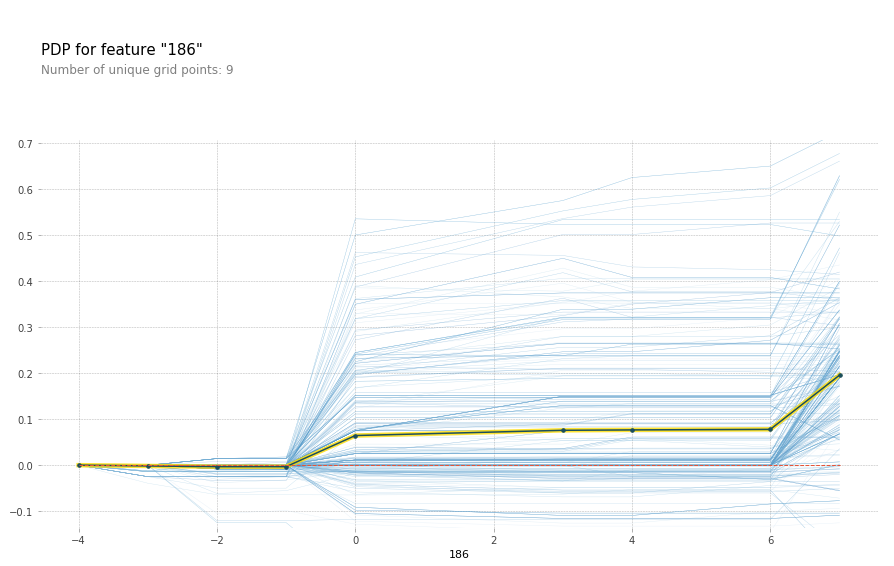

In [640]:
plot_pdp("186")

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b8397b38>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b84a1240>})

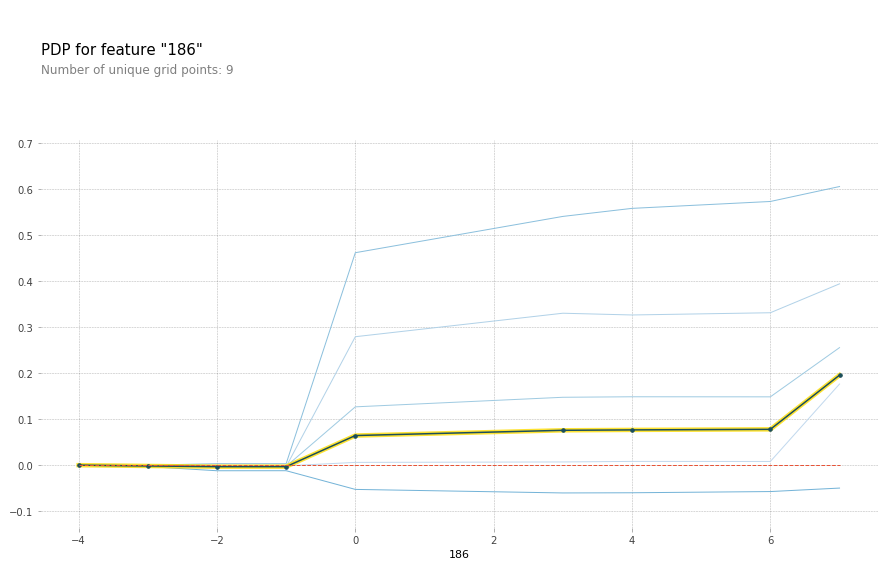

In [641]:
plot_pdp('186', clusters=5)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b6d0ca20>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b741a0b8>})

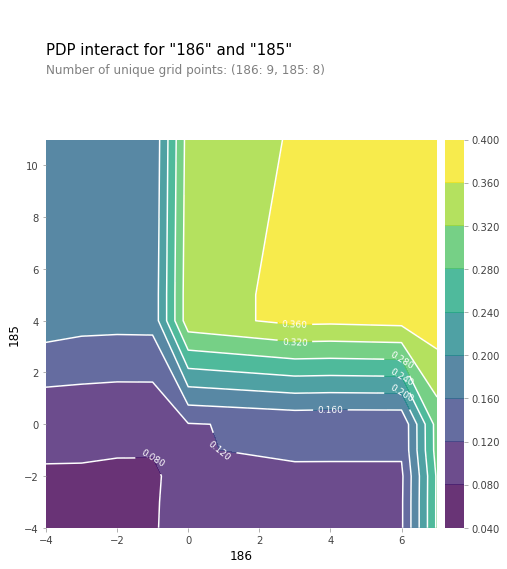

In [650]:
feats = ['186', '185']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

### Tree interpreter

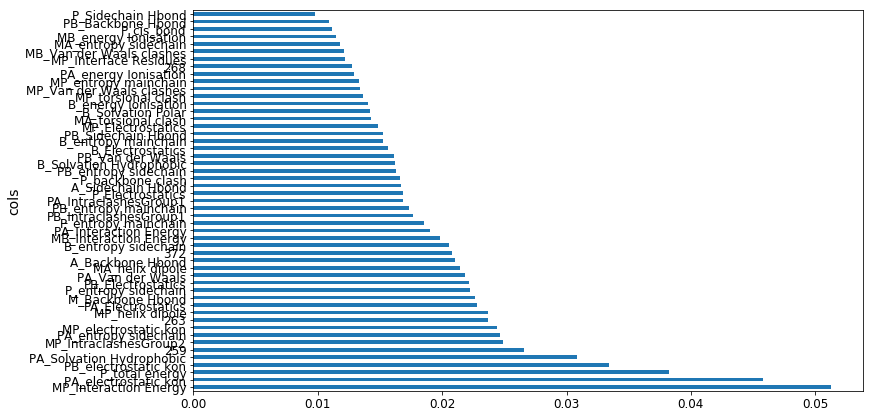

In [1337]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

In [1338]:
from treeinterpreter import treeinterpreter as ti

In [1339]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

KeyError: "['PA_Electrostatics', 'PB_Sidechain Hbond', 'B_Solvation Hydrophobic', 'PB_Backbone Hbond', 'A_Backbone Hbond', 'MP_IntraclashesGroup2', 'P_total energy', 'MA_helix dipole', 'PB_entropy mainchain', 'PA_Interaction Energy', 'B_entropy sidechain', 'MP_torsional clash', 'MB_energy Ionisation', 'MP_Interface Residues', 'MB_Interaction Energy', 'MP_Electrostatics', 'MA_entropy sidechain', 'PB_Electrostatics', 'PA_electrostatic kon', 'PB_electrostatic kon', 'P_cis_bond', 'MP_entropy mainchain', 'M_Backbone Hbond', 'B_energy Ionisation', 'MB_Van der Waals clashes', 'P_entropy sidechain', 'MA_torsional clash', 'MP_helix dipole', 'MP_Interaction Energy', 'B_entropy mainchain', 'PB_entropy sidechain', 'A_Sidechain Hbond', 'PA_IntraclashesGroup1', 'B_Solvation Polar', 'B_Electrostatics', 'PB_IntraclashesGroup1', 'PA_Solvation Hydrophobic', 'MP_Van der Waals clashes', 'P_entropy mainchain', 'PA_Van der Waals', 'P_Electrostatics', 'P_backbone clash', 'MP_electrostatic kon', 'PA_entropy sidechain', 'P_Sidechain Hbond', 'PB_Van der Waals', 'PA_energy Ionisation'] not in index"

In [670]:
row = X_valid.values[None,0]; row

array([[ 7,  6, 11,  5, -1, -1,  7,  6,  6, -2,  5,  4,  4,  4,  4,  4,  6,  4,  6, -2,  6,  7,  4,  5,  5,
         4,  5,  5,  7,  4,  4,  5,  4,  5,  4,  1,  5,  5]])

In [671]:
prediction, bias, contributions = ti.predict(m, row)

In [672]:
prediction[0], bias[0]

(array([1.]), 0.1678)

In [673]:
idxs = np.argsort(contributions[0])

In [674]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('181', -1, -0.060416661271450775),
 ('210', 4, -0.013693313059454242),
 ('326', 4, -0.0004678654678654692),
 ('306', 1, 0.0),
 ('315', 7, 0.0),
 ('378', 5, 0.0),
 ('377', 4, 0.0),
 ('387', 4, 0.0007425742574257432),
 ('189', -2, 0.0009455665724654065),
 ('298', 4, 0.0014367816091954034),
 ('188', -1, 0.002072175258716056),
 ('406', 4, 0.006323575849437918),
 ('182', -2, 0.006960313953243691),
 ('290', 4, 0.007352475465206021),
 ('240', 5, 0.007501085167768014),
 ('187', 7, 0.008739030178755774),
 ('263', 6, 0.009096714455332212),
 ('198', 6, 0.009409177933232857),
 ('350', 5, 0.011856380602308536),
 ('420', 5, 0.01208555825338172),
 ('316', 5, 0.013305831855667851),
 ('435', 4, 0.013420937549444886),
 ('237', 7, 0.014068627450980392),
 ('245', 4, 0.01676685637254027),
 ('460', 4, 0.017227785190056737),
 ('303', 4, 0.01930610969092781),
 ('184', 6, 0.022619409467261153),
 ('268', 5, 0.02270658263305322),
 ('213', 6, 0.02749337401810468),
 ('215', 5, 0.031735537422820155),
 ('259', 6, 

In [675]:
contributions[0].sum()

0.8322

In [676]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 528 ms, sys: 64.1 ms, total: 592 ms
Wall time: 281 ms
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.03789569654434071, 0.19476715532056915, 0.9896601965206185, 0.7268734375000001, 0.9420212503161177]
